In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
from hydra.utils import instantiate
from hydra import initialize, compose
import hydra

from data.dataManager import DataManager
from model.modelCreator import ModelCreator
from omegaconf import OmegaConf
from scripts.run import setup_model, load_model_instance

from utils.plots import vae_plots

In [2]:
hydra.core.global_hydra.GlobalHydra.instance().clear()
initialize(version_base=None, config_path="config")
config=compose(config_name="config.yaml")

In [3]:
config.wandb.watch = 0
new_model = True
if new_model:
    self = setup_model(config)
    # self.model = self.model.double()  # sets all model parameters to float64
else:
    self = load_model_instance(config.config_path)
    # self.model = self.model.double()


[22:21:34.235] INFO   data.dataManager                                  Keys: ['incident_energies', 'showers']


[22:21:37.620] INFO   data.dataManager                                  dict_keys(['incident_energies', 'showers'])
[22:21:37.623] INFO   data.dataManager                                  <torch.utils.data.dataloader.DataLoader object at 0x7f1041463770>: 101816 events, 796 batches
[22:21:37.623] INFO   data.dataManager                                  <torch.utils.data.dataloader.DataLoader object at 0x7f1040d39a30>: 12728 events, 13 batches
[22:21:37.624] INFO   data.dataManager                                  <torch.utils.data.dataloader.DataLoader object at 0x7f12d806cad0>: 12727 events, 13 batches
[22:21:37.625] INFO   model.modelCreator                                ::Creating Model
[22:21:37.882] INFO   dwave.cloud.client.base                           Fetching definitions of all available solvers
[22:21:38.049] INFO   dwave.cloud.client.base                           Received solver data for 7 solver(s).
[22:21:38.333] INFO   dwave.cloud.client.base                           A

cuda:1


[22:21:39.560] INFO   scripts.run                                       Model NOT being watched by wandb


encoder._networks.0.seq1.0.conv.weight True
encoder._networks.0.seq1.0.conv.bias True
encoder._networks.0.seq1.1.weight True
encoder._networks.0.seq1.1.bias True
encoder._networks.0.seq1.2.weight True
encoder._networks.0.seq1.3.conv.weight True
encoder._networks.0.seq1.3.conv.bias True
encoder._networks.0.seq1.4.weight True
encoder._networks.0.seq1.4.bias True
encoder._networks.0.seq1.5.weight True
encoder._networks.0.seq2.0.conv.weight True
encoder._networks.0.seq2.0.conv.bias True
encoder._networks.0.seq2.1.weight True
encoder._networks.0.seq2.1.bias True
encoder._networks.0.seq2.2.weight True
encoder._networks.0.seq2.3.conv.weight True
encoder._networks.0.seq2.3.conv.bias True
encoder._networks.0.seq2.4.weight True
encoder._networks.1.seq1.0.conv.weight True
encoder._networks.1.seq1.0.conv.bias True
encoder._networks.1.seq1.1.weight True
encoder._networks.1.seq1.1.bias True
encoder._networks.1.seq1.2.weight True
encoder._networks.1.seq1.3.conv.weight True
encoder._networks.1.seq1.3.

Keys: ['binsize_alpha_layer_0', 'binsize_alpha_layer_1', 'binsize_alpha_layer_10', 'binsize_alpha_layer_11', 'binsize_alpha_layer_12', 'binsize_alpha_layer_13', 'binsize_alpha_layer_14', 'binsize_alpha_layer_15', 'binsize_alpha_layer_16', 'binsize_alpha_layer_17', 'binsize_alpha_layer_18', 'binsize_alpha_layer_19', 'binsize_alpha_layer_2', 'binsize_alpha_layer_20', 'binsize_alpha_layer_21', 'binsize_alpha_layer_22', 'binsize_alpha_layer_23', 'binsize_alpha_layer_3', 'binsize_alpha_layer_4', 'binsize_alpha_layer_5', 'binsize_alpha_layer_6', 'binsize_alpha_layer_7', 'binsize_alpha_layer_8', 'binsize_alpha_layer_9', 'binsize_radius_layer_0', 'binsize_radius_layer_1', 'binsize_radius_layer_10', 'binsize_radius_layer_11', 'binsize_radius_layer_12', 'binsize_radius_layer_13', 'binsize_radius_layer_14', 'binsize_radius_layer_15', 'binsize_radius_layer_16', 'binsize_radius_layer_17', 'binsize_radius_layer_18', 'binsize_radius_layer_19', 'binsize_radius_layer_2', 'binsize_radius_layer_20', 'bin

NameError: name 'image_input' is not defined

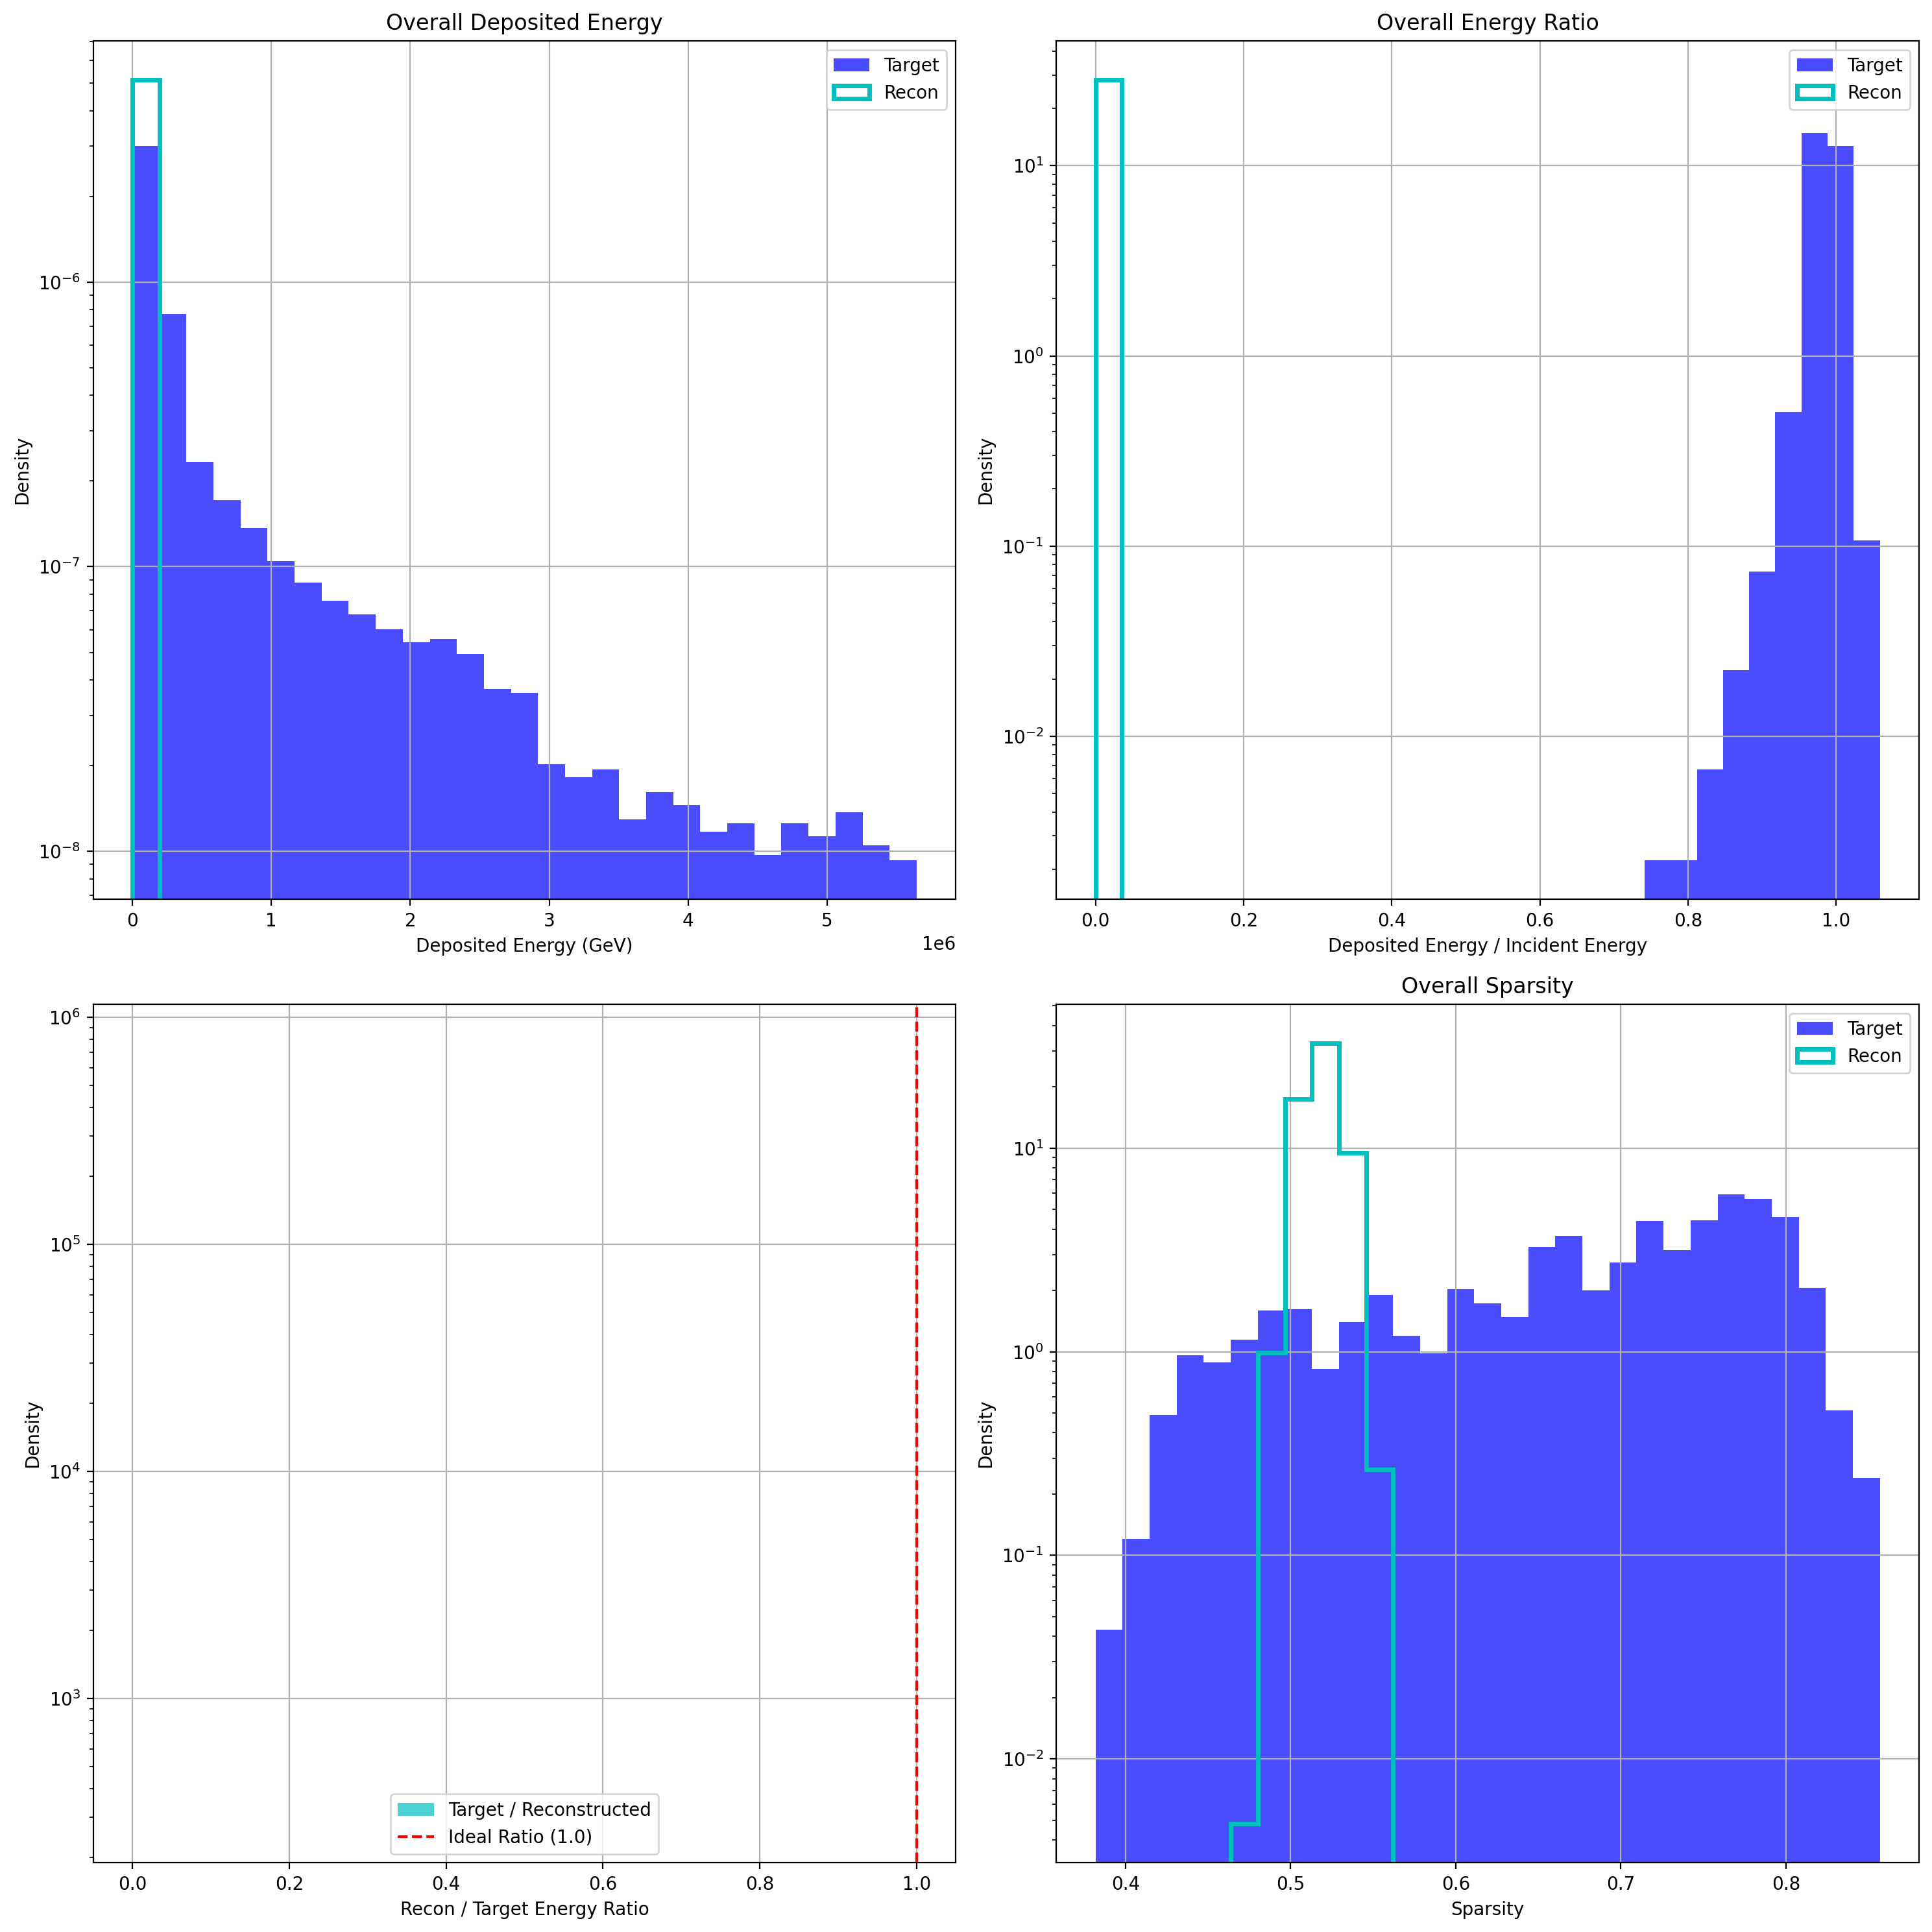

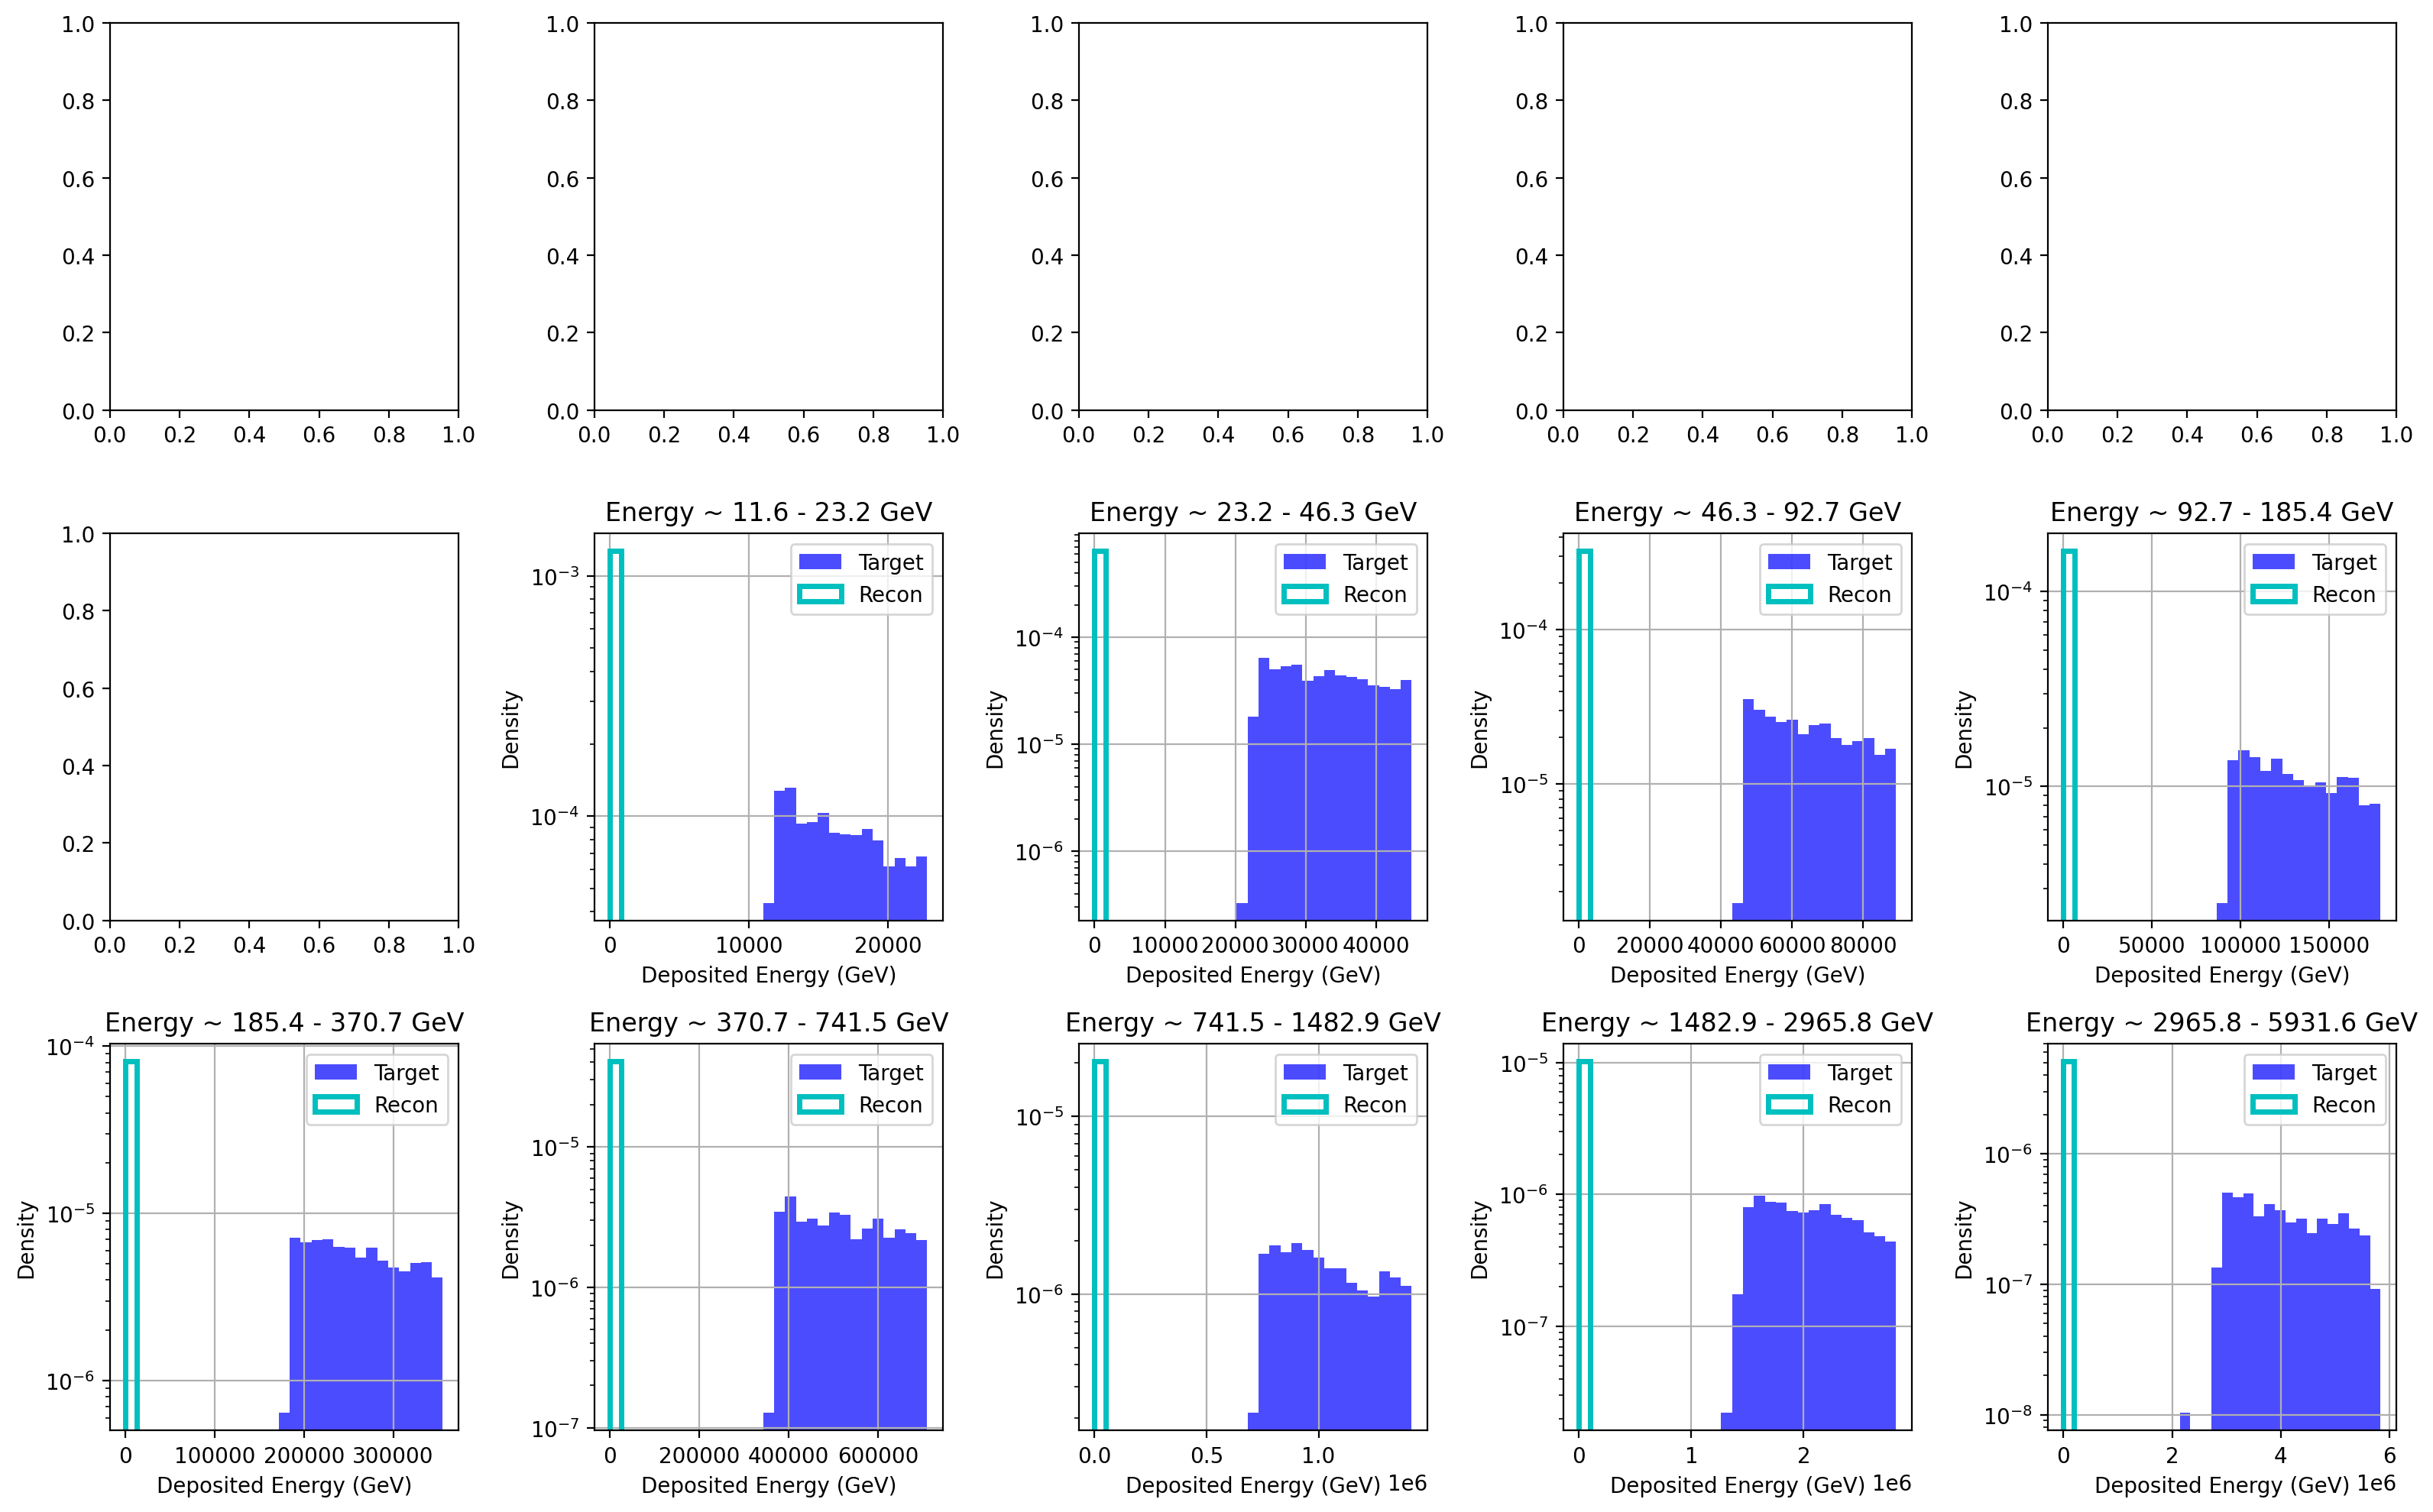

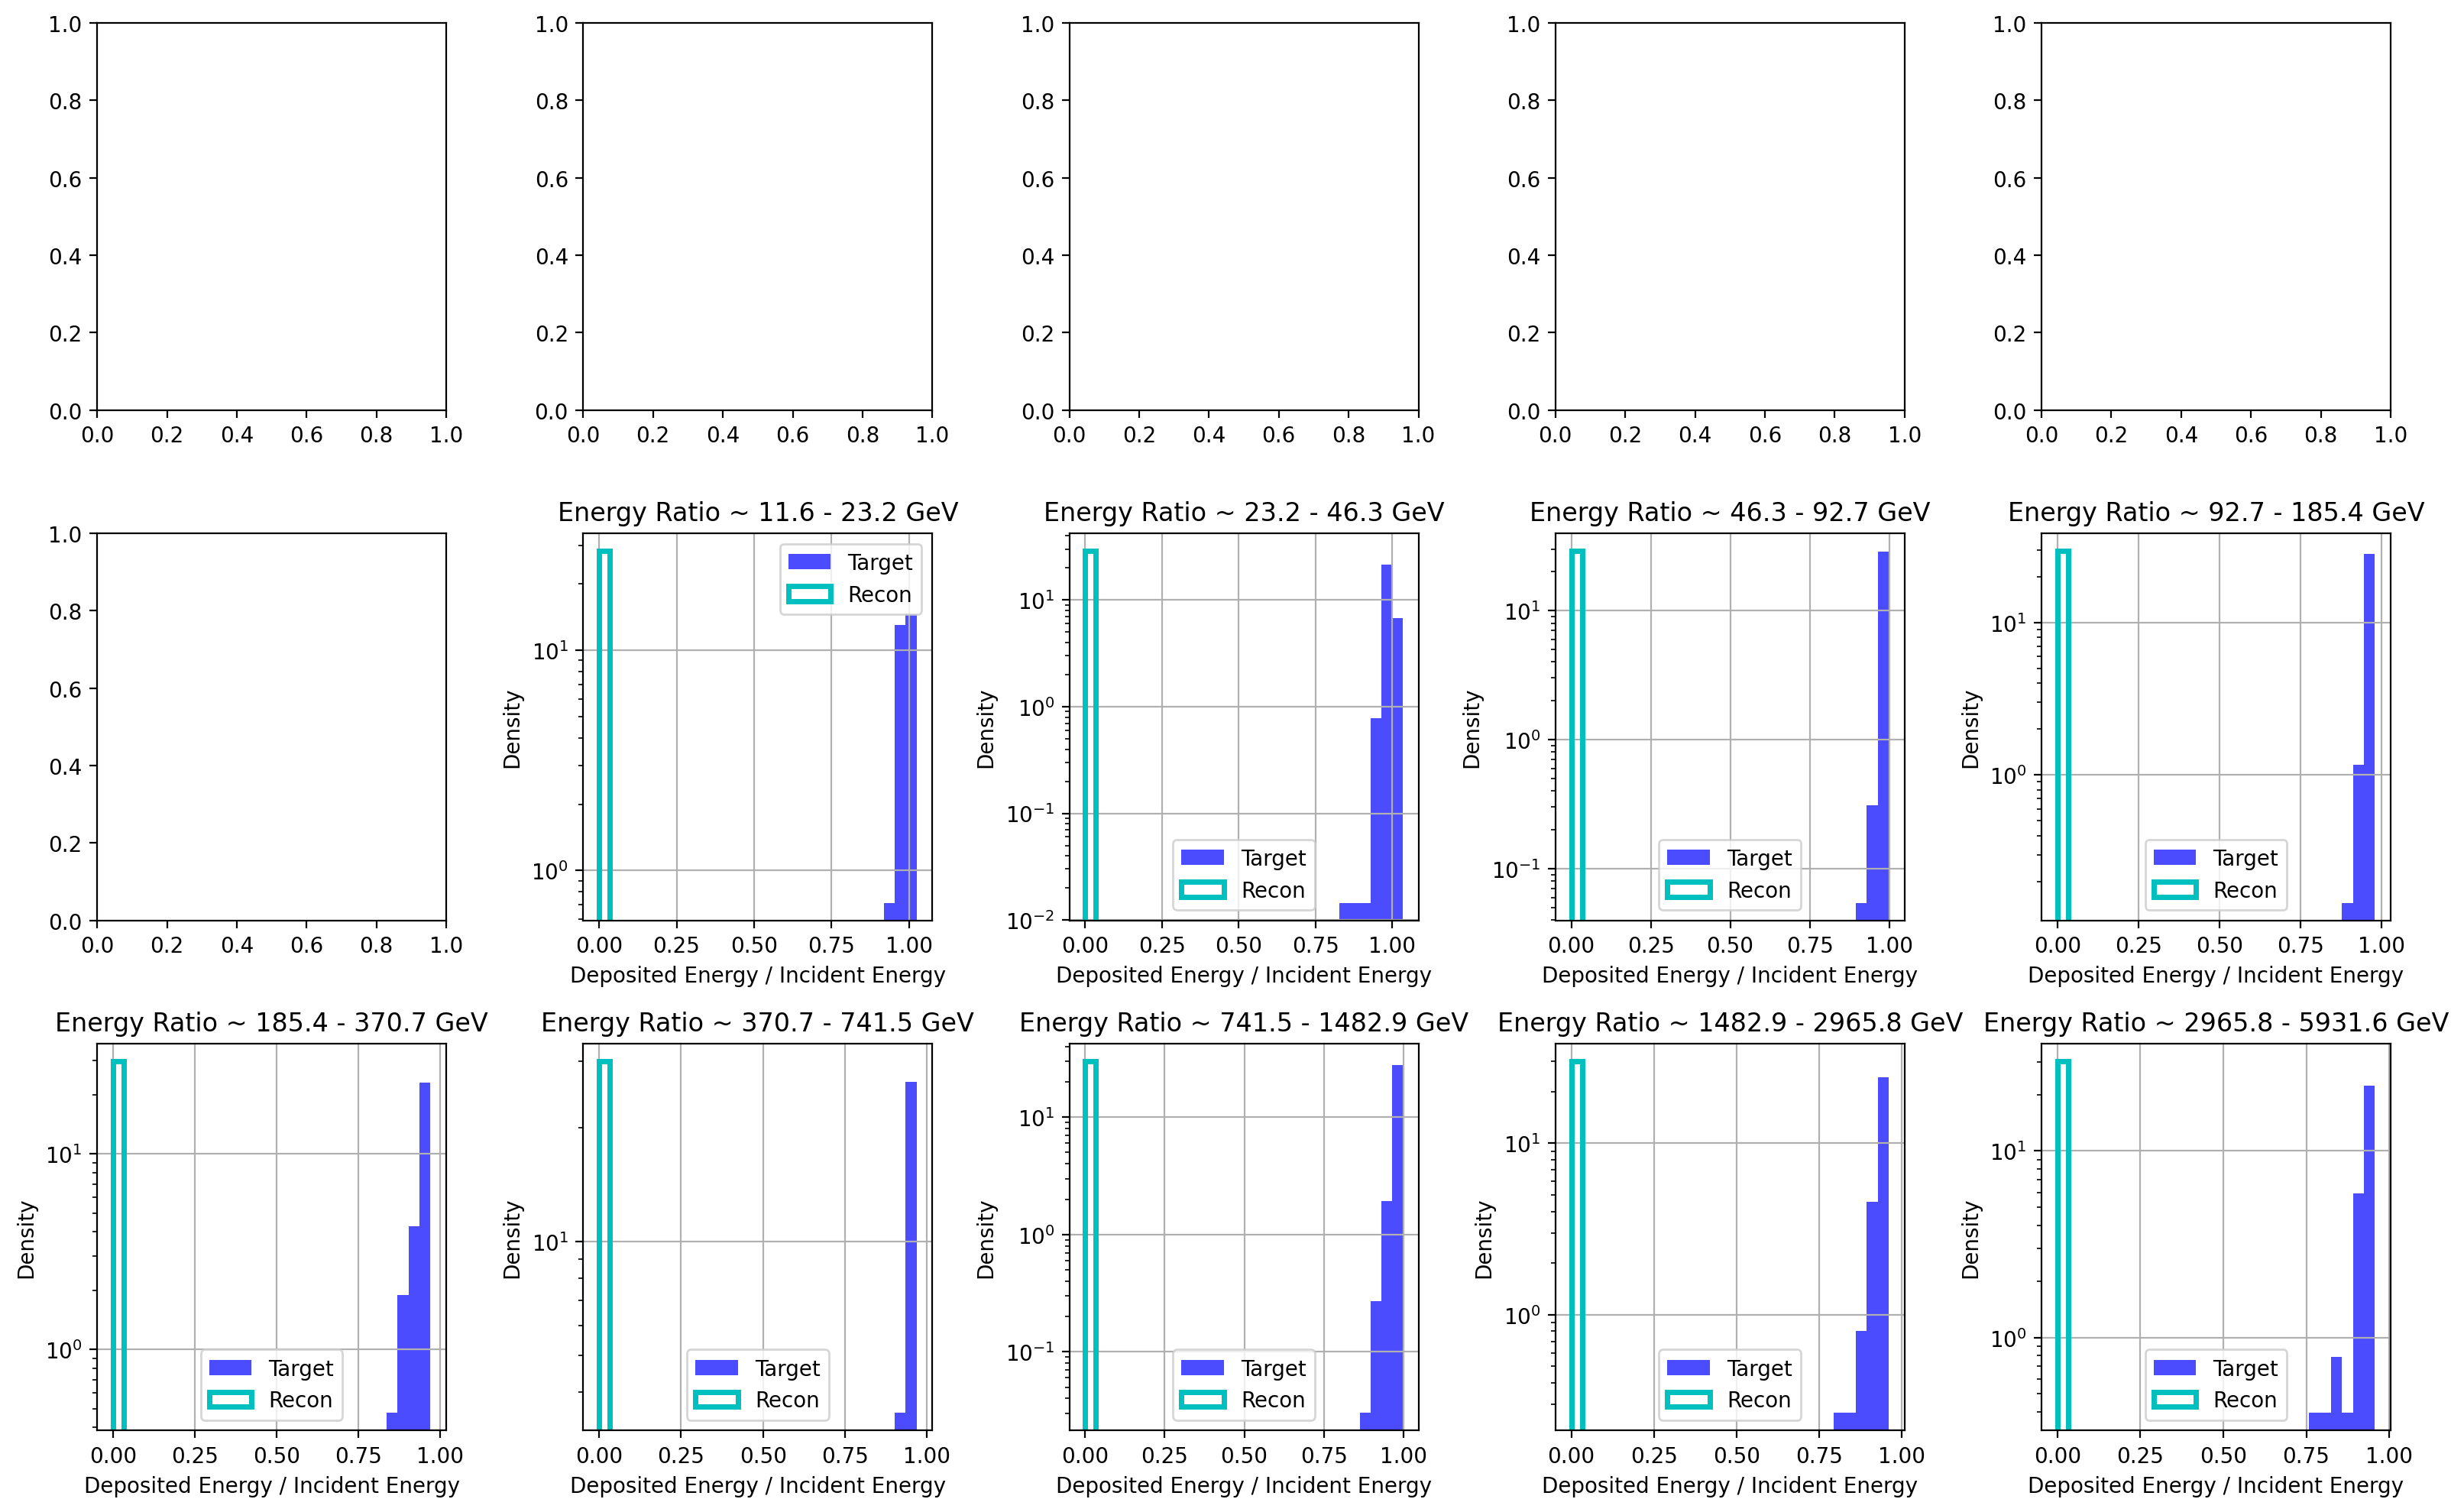

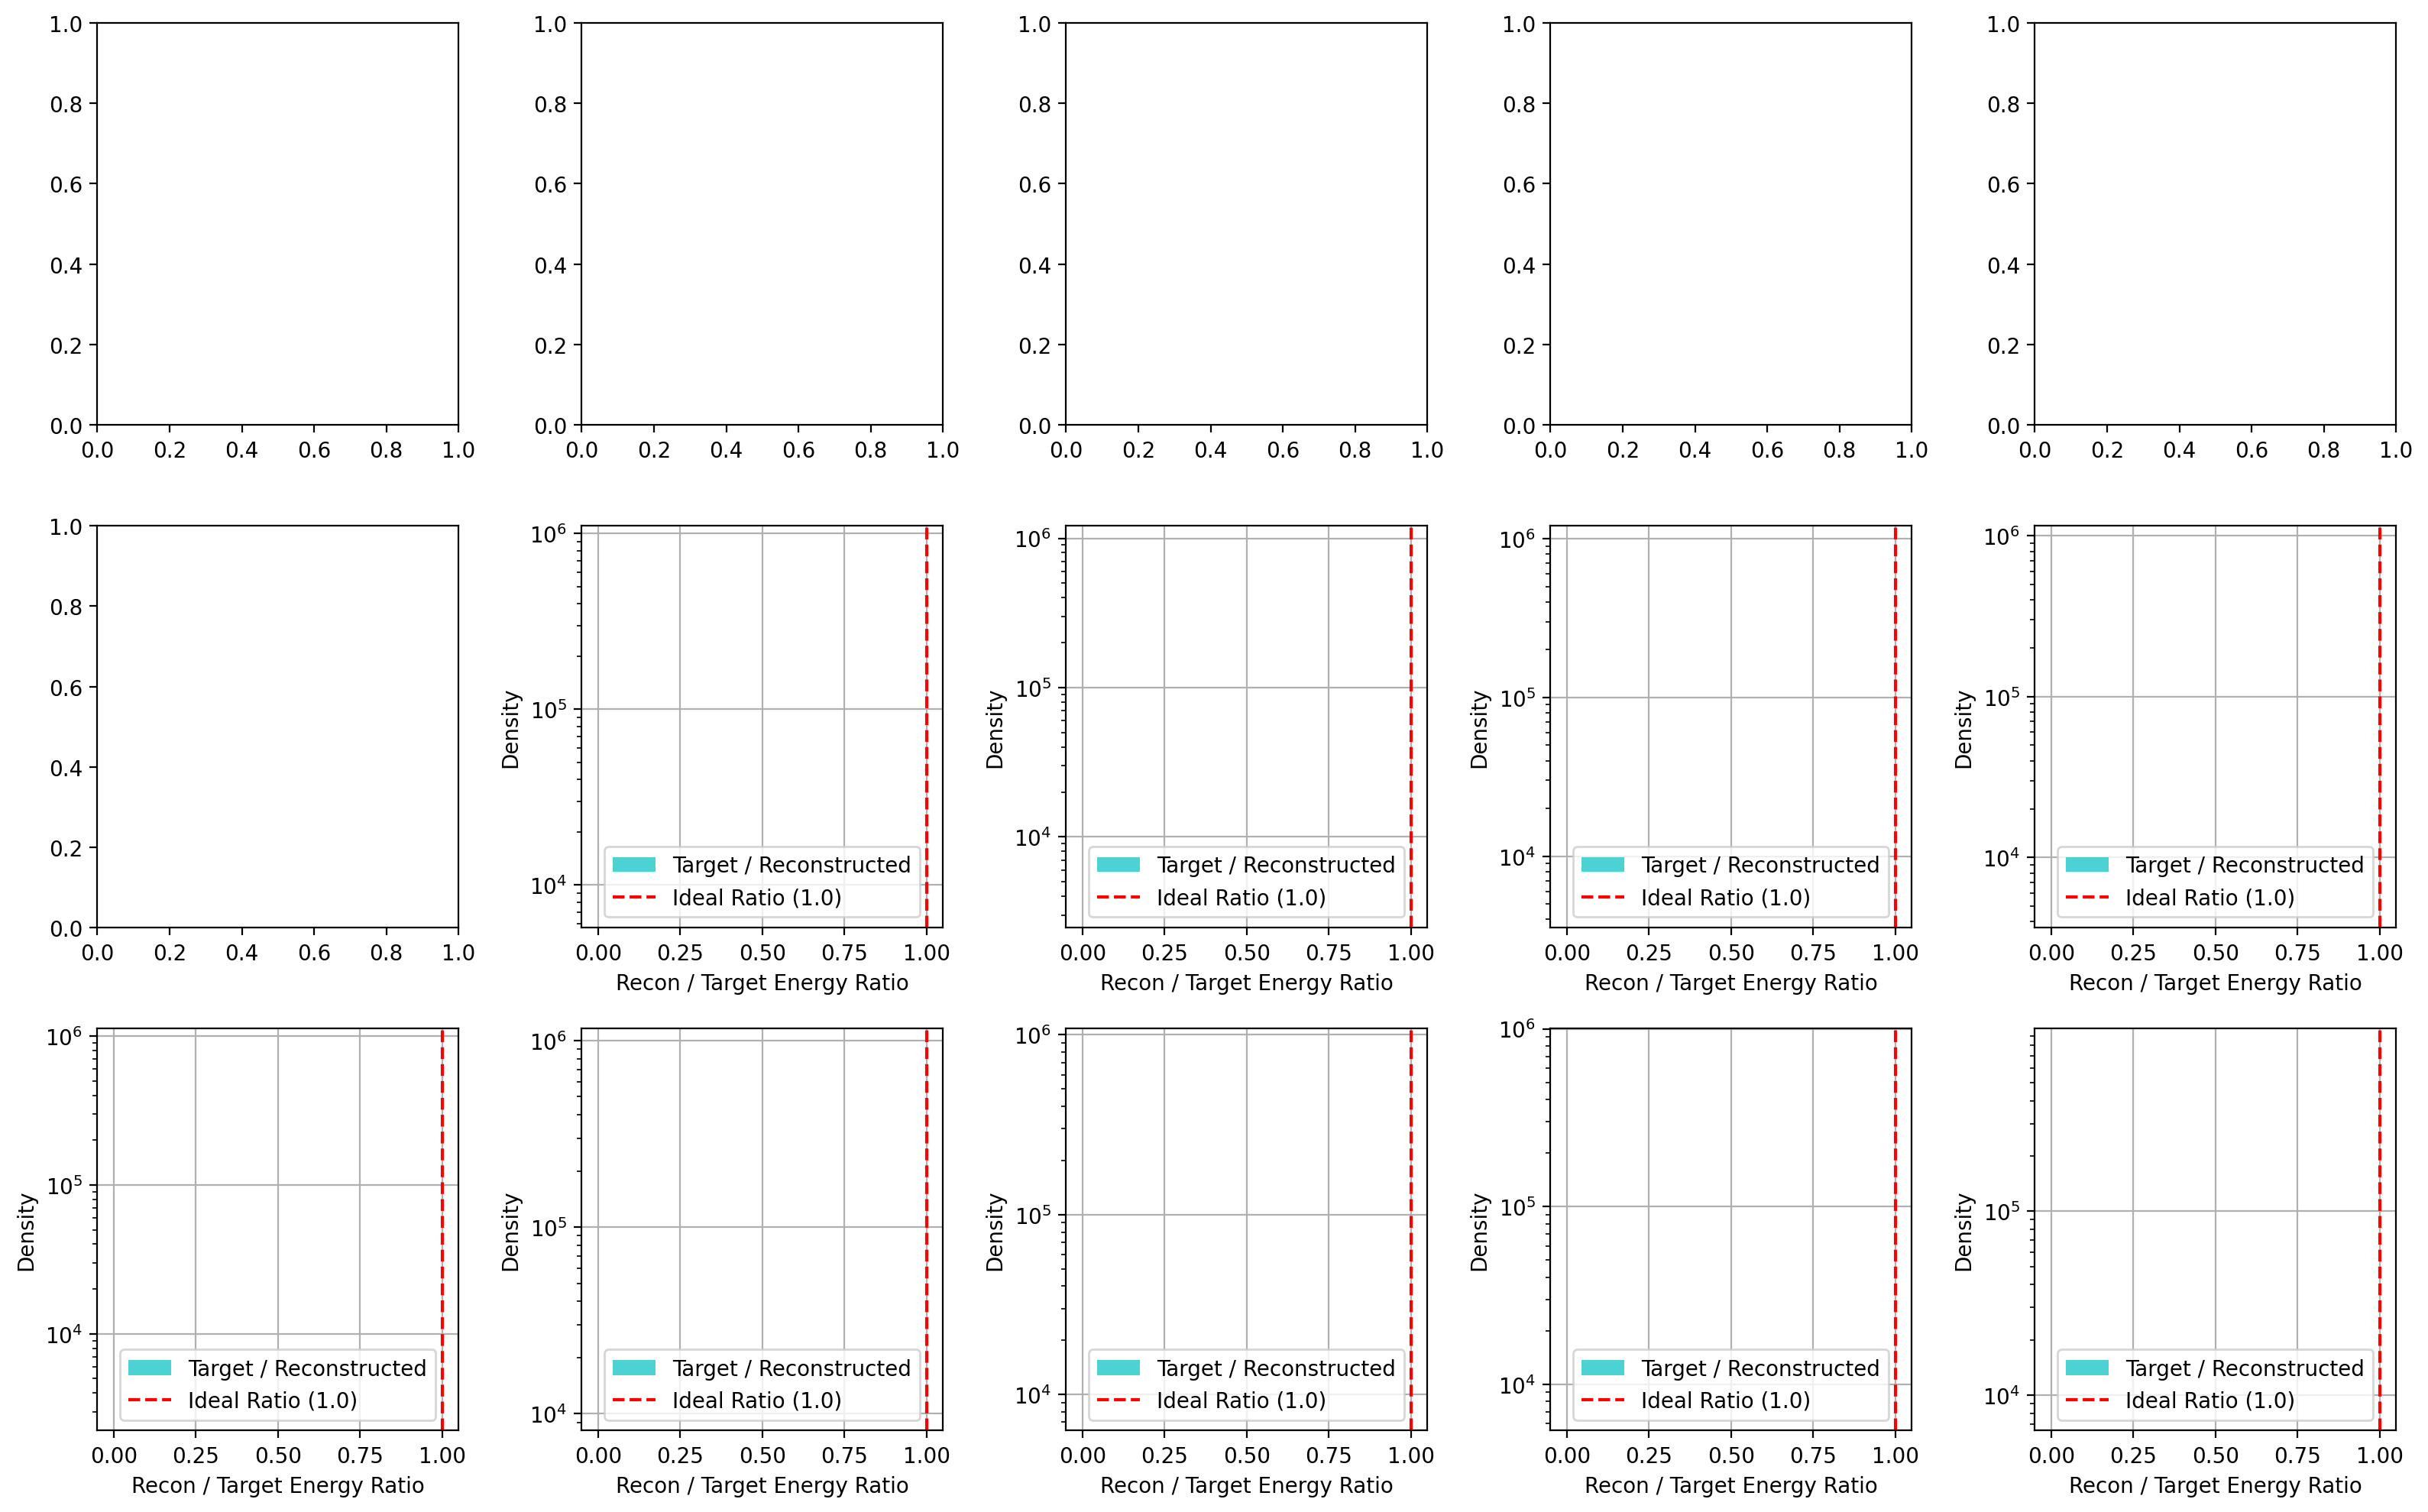

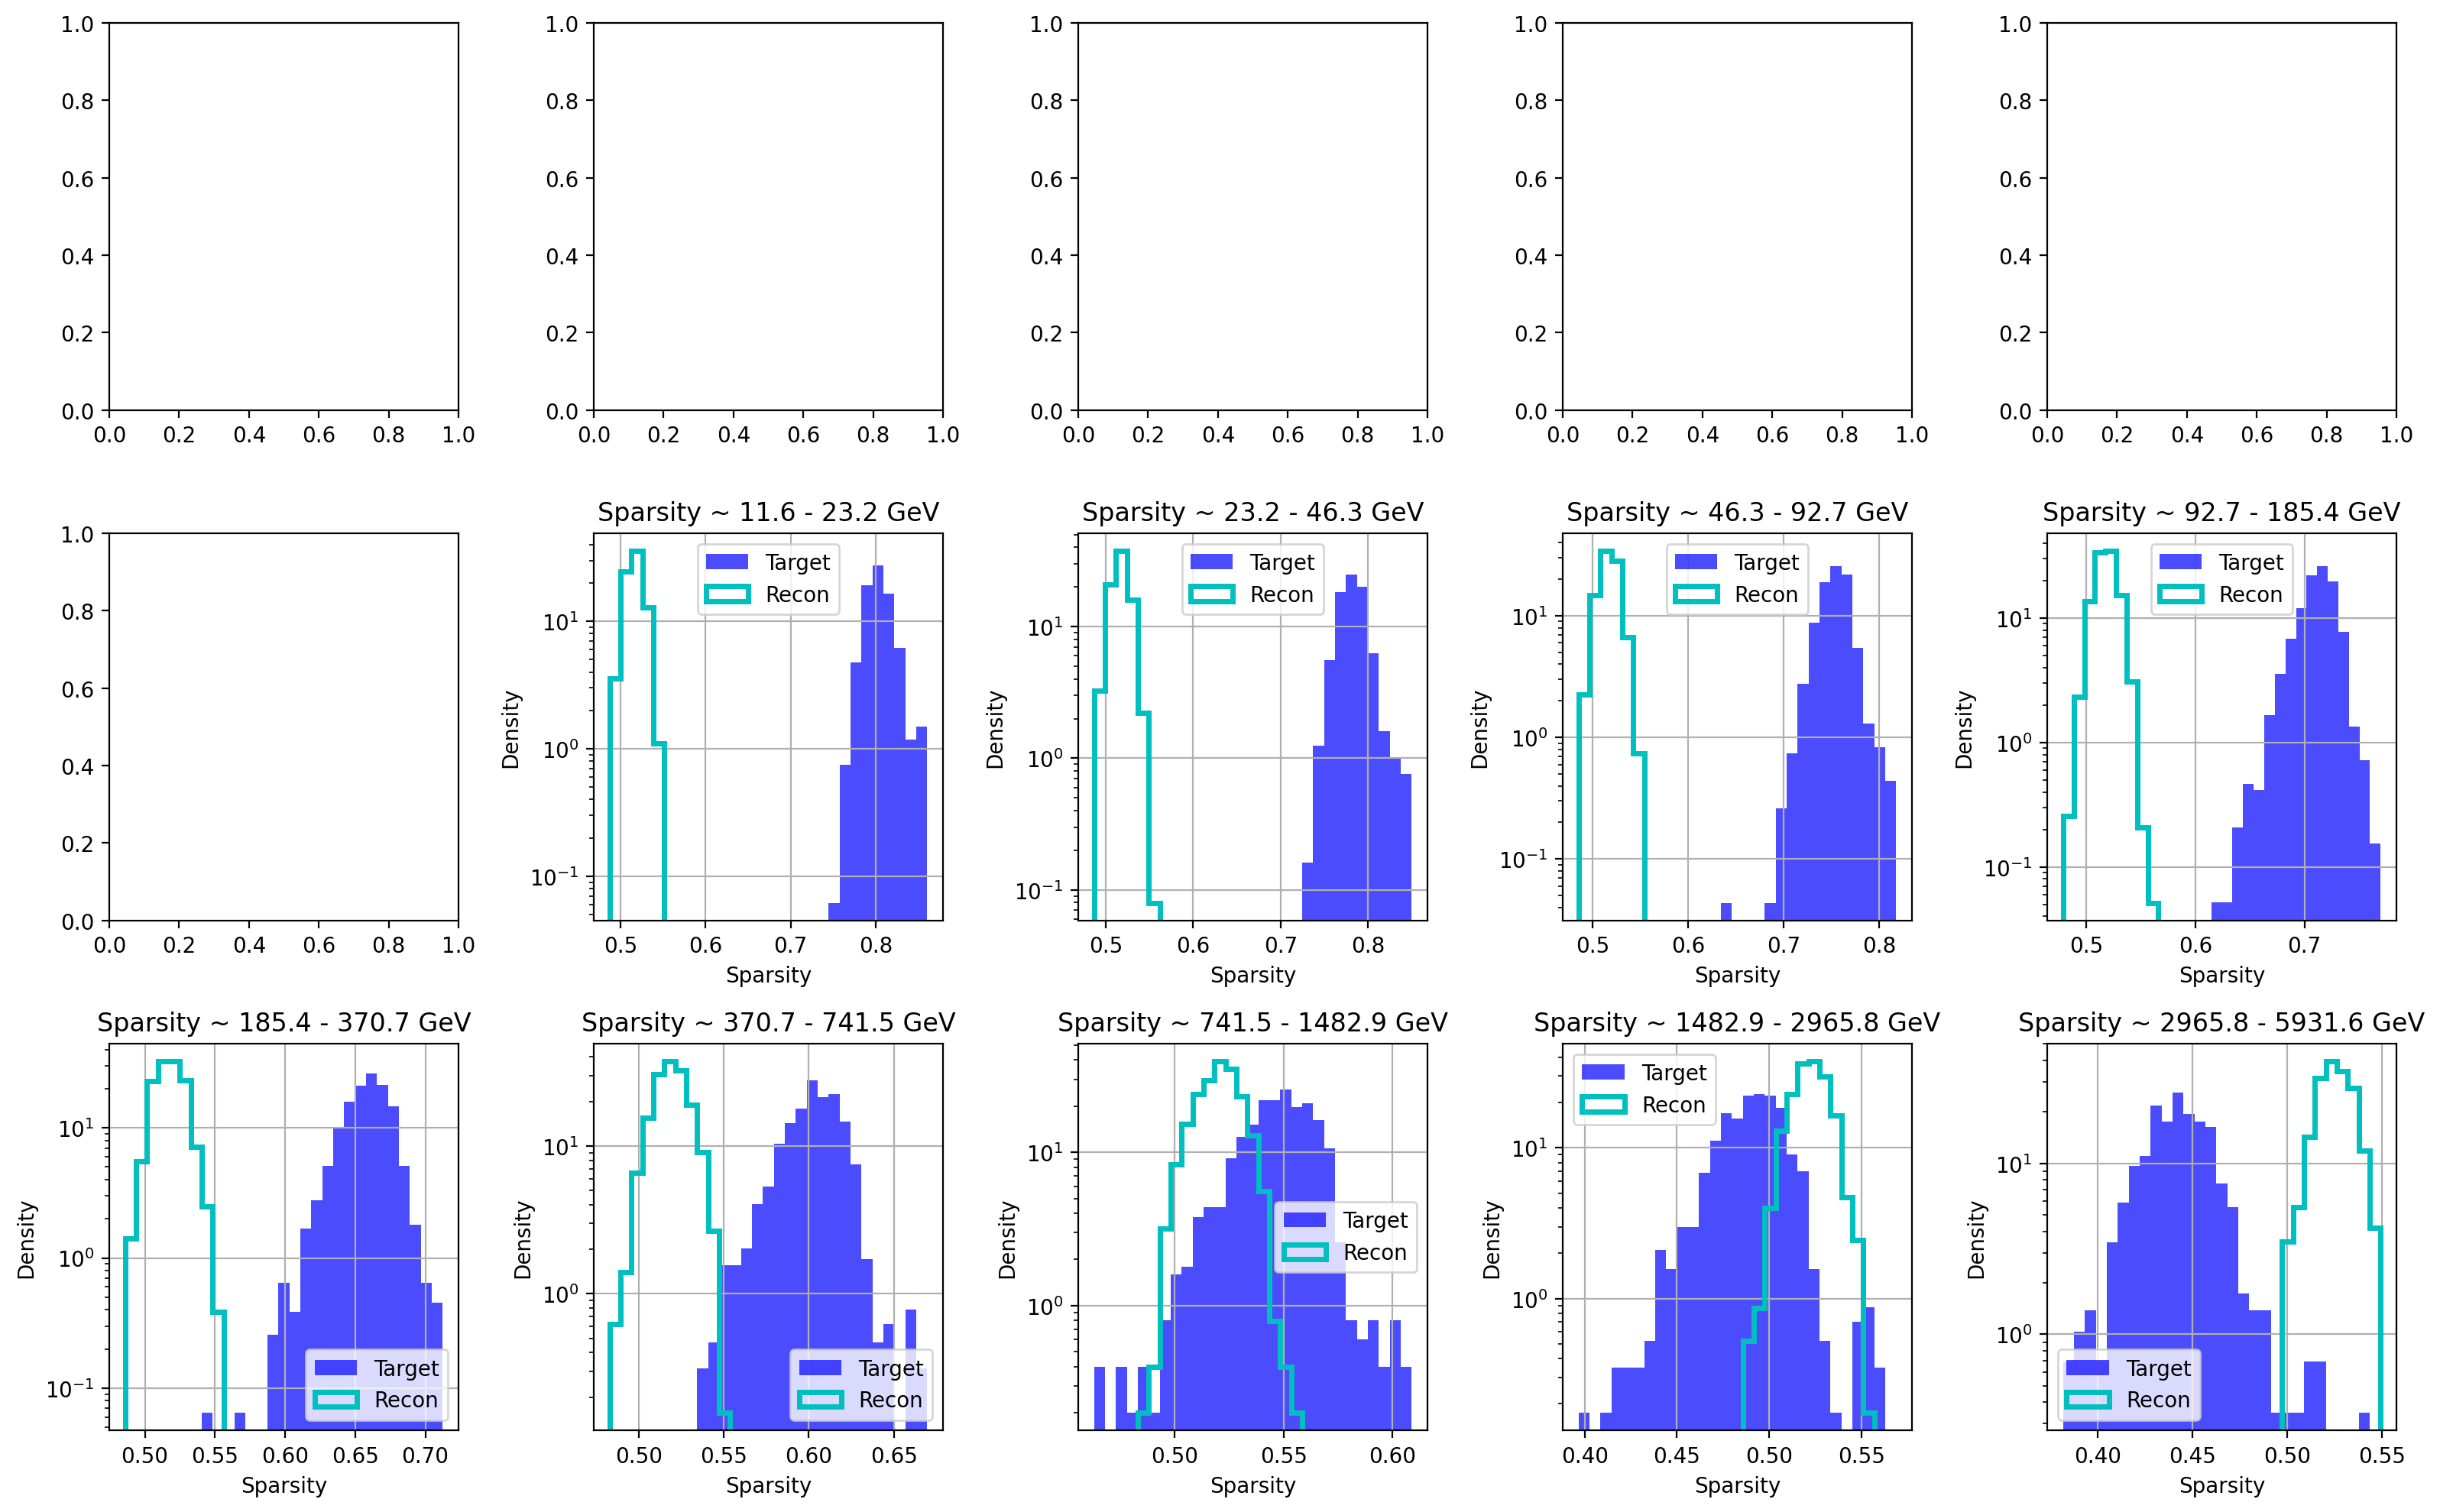

In [4]:
self.evaluate(self.data_mgr.test_loader, 0)

In [9]:
# vae_plots(self.incident_energy, self.showers, self.showers_recon)

In [10]:
self.model.train()
# with torch.no_grad():
x,x0 = next(iter(self.data_mgr.test_loader))
x = x.to(self.device).to(dtype=torch.float32)
x0 = x0.to(self.device).to(dtype=torch.float32)
x_reduce = self._reduce(x, x0)
# Forward pass
output = self.model((x_reduce, x0))
loss_dict = self.model.loss(x_reduce, output)

    # prior_samples = self.model.prior.block_gibbs_sampling_cond(p0 = output[2][0])
    # _, shower_prior = self.model.decode(prior_samples, x0)

OutOfMemoryError: CUDA out of memory. Tried to allocate 2.00 MiB. GPU 1 has a total capacity of 47.40 GiB of which 1.56 MiB is free. Process 3133883 has 2.55 GiB memory in use. Including non-PyTorch memory, this process has 30.97 GiB memory in use. Process 3162570 has 13.86 GiB memory in use. Of the allocated memory 29.41 GiB is allocated by PyTorch, and 1.24 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [33]:
torch.stack([loss_dict[key] * config.engine.loss_coeff[key]  for key in loss_dict.keys() if "loss" != key]).sum()

tensor(48267.6016, device='cuda:1')

In [26]:
[loss_dict[key] * config.engine.loss_coeff[key]  for key in loss_dict.keys() if "loss" != key]

[tensor(45776.6992, device='cuda:1', grad_fn=<MulBackward0>),
 tensor(-0., device='cuda:1', grad_fn=<MulBackward0>),
 tensor(2823.4062, device='cuda:1', grad_fn=<MulBackward0>),
 tensor(-606.5768, device='cuda:1'),
 tensor(26.1423, device='cuda:1', grad_fn=<MulBackward0>),
 tensor(282.8821, device='cuda:1', grad_fn=<MulBackward0>)]

In [28]:
loss_dict["ae_loss"]

tensor(45776.6992, device='cuda:1', grad_fn=<MulBackward0>)

In [22]:
from model.rbm.zephyr import ZephyrRBM, ZephyrRBM_Old

In [ ]:
config.rbm.latent_nodes_per_p=512
new = ZephyrRBM(config)
old = ZephyrRBM_Old(config)

binwidth = 1.0
new_data, old_data = {}, {}
for key in new.weight_dict.keys():
    # data[key] = engine.model.prior.weight_dict[key].sign().abs().sum(dim=0).detach().cpu().numpy()
    new_data[key] = new._weight_mask_dict[key].abs().sum(dim=0).cpu().numpy()
for key in old.weight_dict.keys():
    old_data[key] = old._weight_mask_dict[key].abs().sum(dim=0).cpu().numpy()
    


[19:30:44.060] INFO   dwave.cloud.client.base                           Fetching definitions of all available solvers


[19:30:44.245] INFO   dwave.cloud.client.base                           Received solver data for 7 solver(s).
[19:30:44.622] INFO   dwave.cloud.client.base                           Adding solver StructuredSolver(id='Advantage_system4.1')
[19:30:44.684] INFO   dwave.cloud.client.base                           Adding solver StructuredSolver(id='Advantage_system6.4')
[19:30:44.760] INFO   dwave.cloud.client.base                           Adding solver StructuredSolver(id='Advantage2_system1.3')


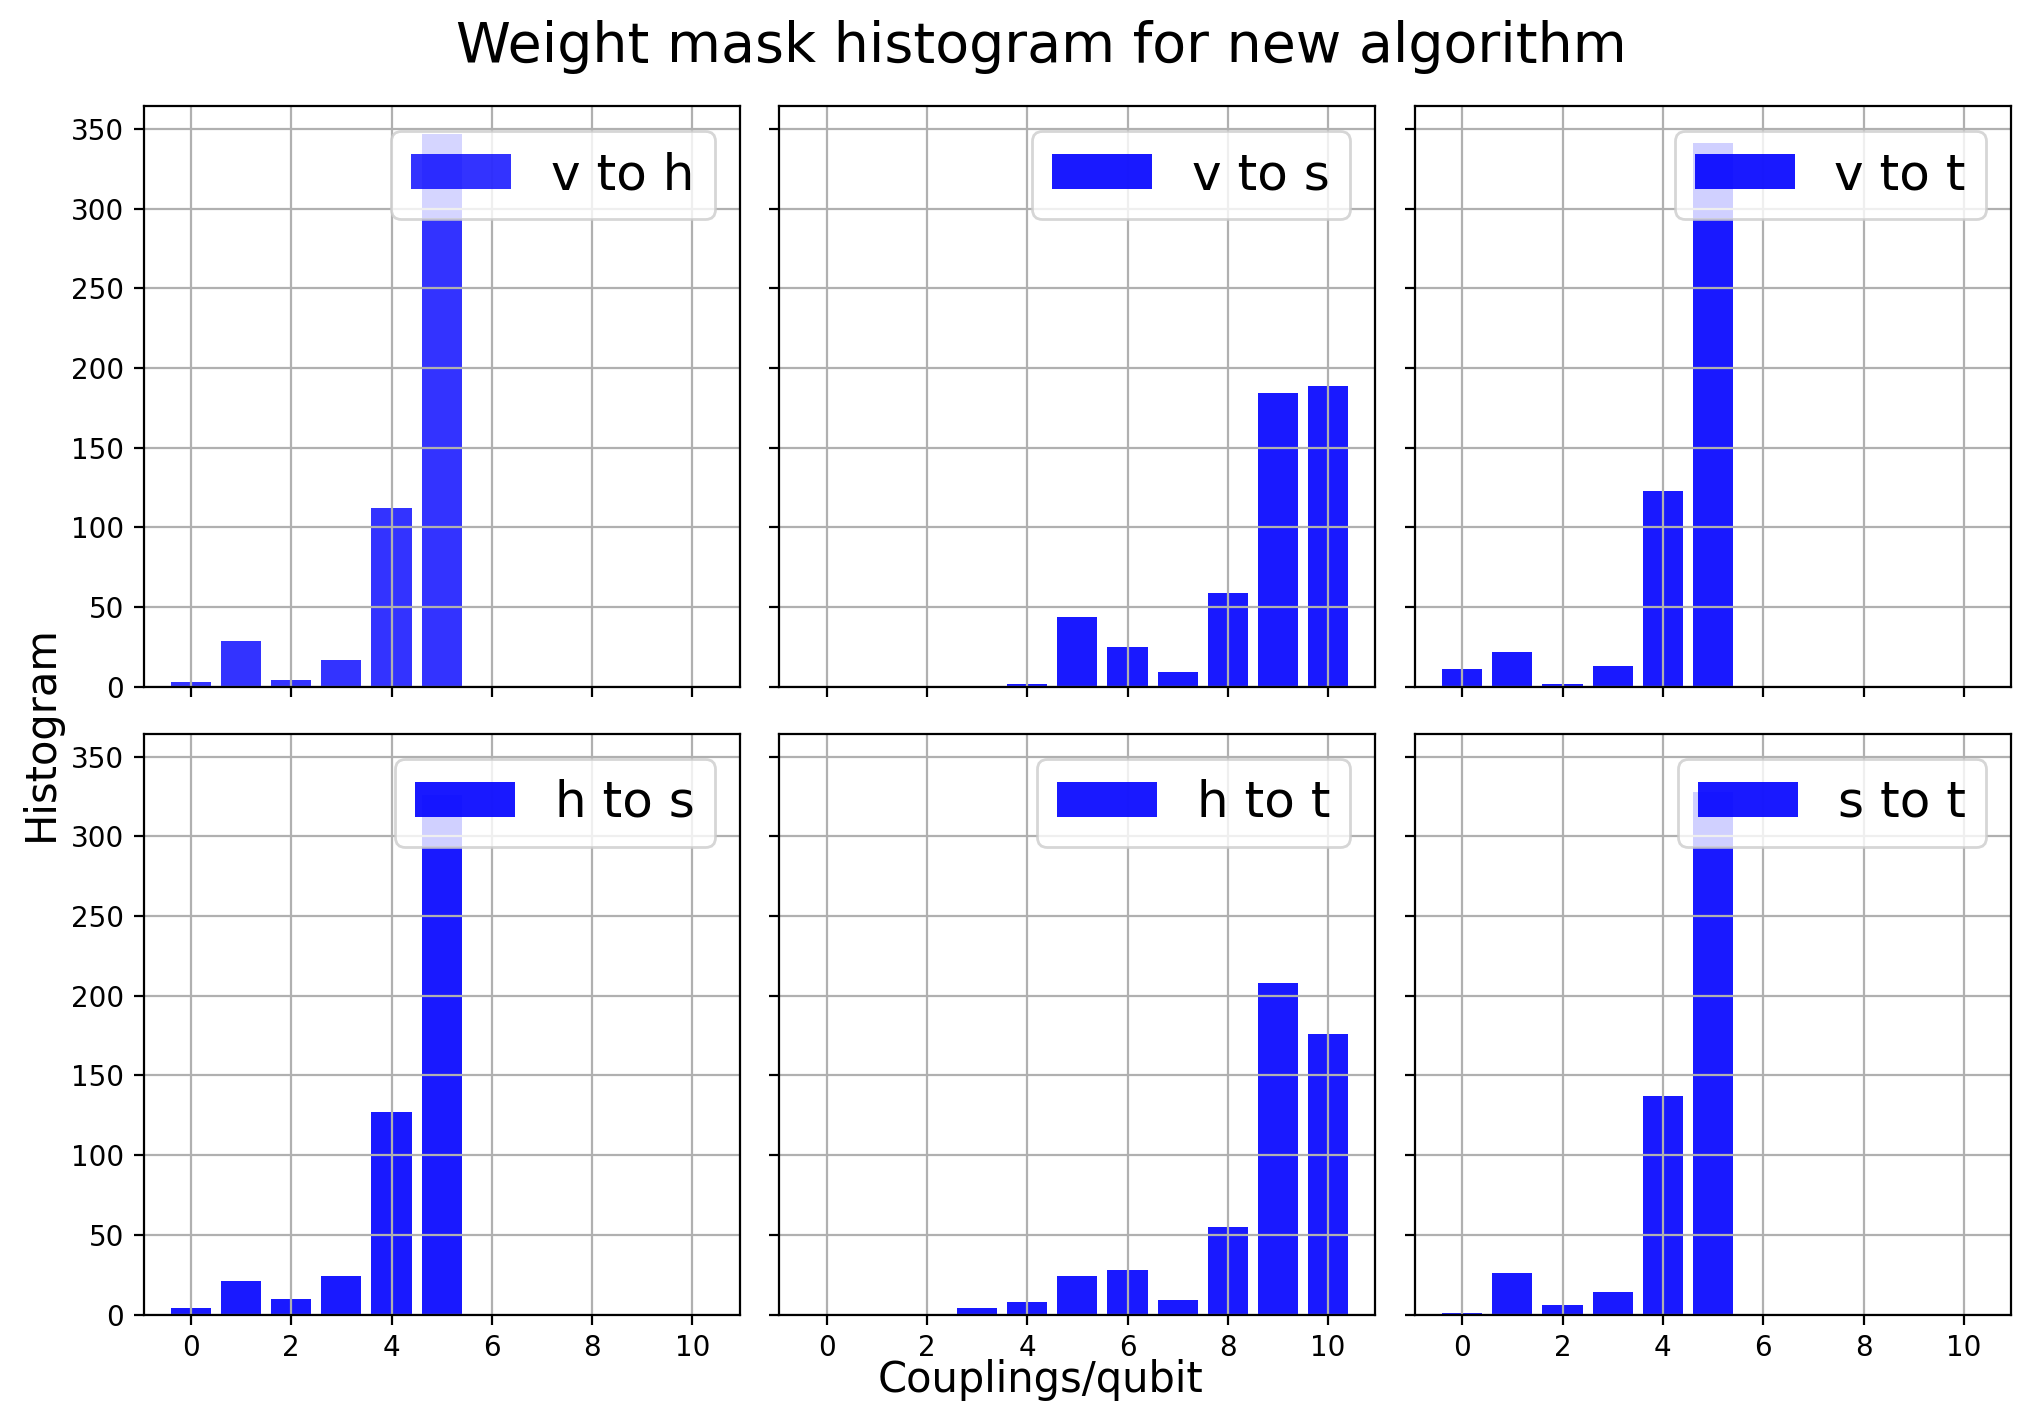

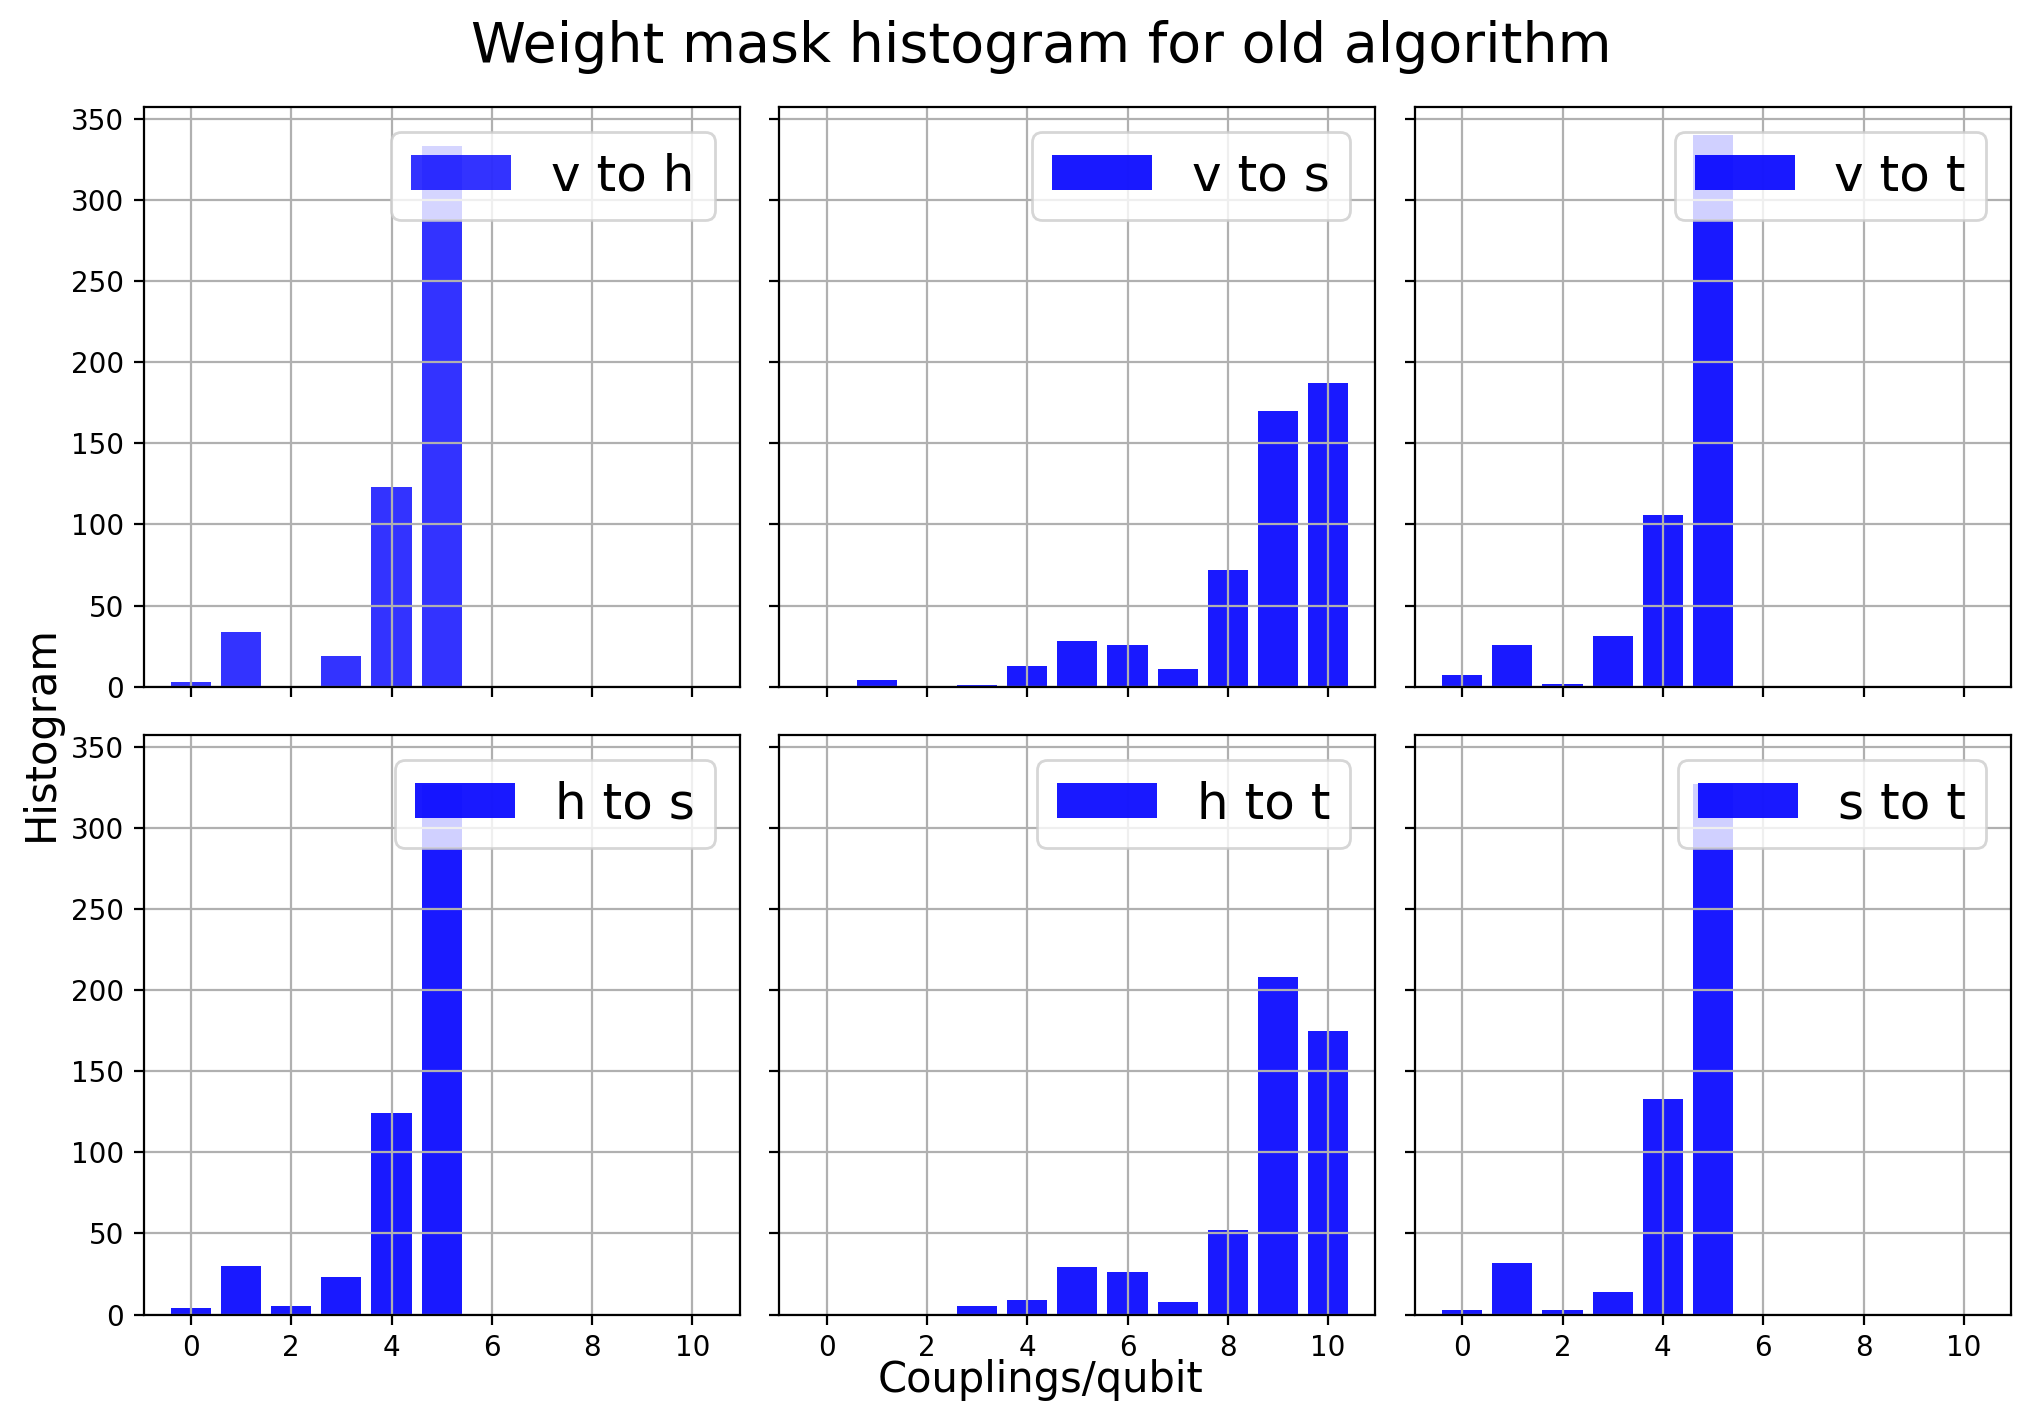

In [7]:
def plot_weights(data, label):
    # Create 2x2 grid of subplots
    fig, axs = plt.subplots(2, 3, figsize=(10, 7), sharey=True, sharex=True, tight_layout=True)  # 2x2 grid, figure size 10x10
    fig.text(0.5, 0.0, 'Couplings/qubit', ha='center', fontsize=15)
    fig.text(0.0, 0.4, 'Histogram', rotation=90, ha='center', fontsize=15)

    # Plot data on each subplot
    labels, counts = np.unique(data['01'], return_counts=True)
    axs[0,0].bar(labels, counts, align='center', color="b", alpha=0.8)
    # axs[0, 0].hist(data['01'], bins=np.arange(min(data['01']), max(data['01']) + binwidth, binwidth), histtype='stepfilled', linewidth=2.5, color="b", alpha=0.7, align='center')
    axs[0,0].grid("True")
    axs[0,0].legend(["v to h"], fontsize=18)

    labels, counts = np.unique(data['02'], return_counts=True)
    axs[0,1].bar(labels, counts, align='center', color="b", alpha=0.9)
    axs[0,1].grid("True")
    axs[0,1].legend(["v to s"], fontsize=18)

    labels, counts = np.unique(data['03'], return_counts=True)
    axs[0,2].bar(labels, counts, align='center', color="b", alpha=0.9)
    axs[0,2].grid("True")
    axs[0,2].legend(["v to t"], fontsize=18)

    labels, counts = np.unique(data['12'], return_counts=True)
    axs[1,0].bar(labels, counts, align='center', color="b", alpha=0.9)
    axs[1,0].grid("True")
    axs[1,0].legend(["h to s"], fontsize=18)

    labels, counts = np.unique(data['13'], return_counts=True)
    axs[1,1].bar(labels, counts, align='center', color="b", alpha=0.9)
    axs[1,1].grid("True")
    axs[1,1].legend(["h to t"], fontsize=18)

    labels, counts = np.unique(data['23'], return_counts=True)
    axs[1,2].bar(labels, counts, align='center', color="b", alpha=0.9)
    axs[1,2].grid("True")
    axs[1,2].legend(["s to t"], fontsize=18)

    # plt.savefig(f'/home/javier/Projects/CaloQVAE/figs/weights_plot_zephyr.png', bbox_inches="tight")
    plt.suptitle(f"Weight mask histogram for {label}", fontsize=20)

    plt.show()
plot_weights(new_data, "new algorithm")
plot_weights(old_data, "old algorithm")

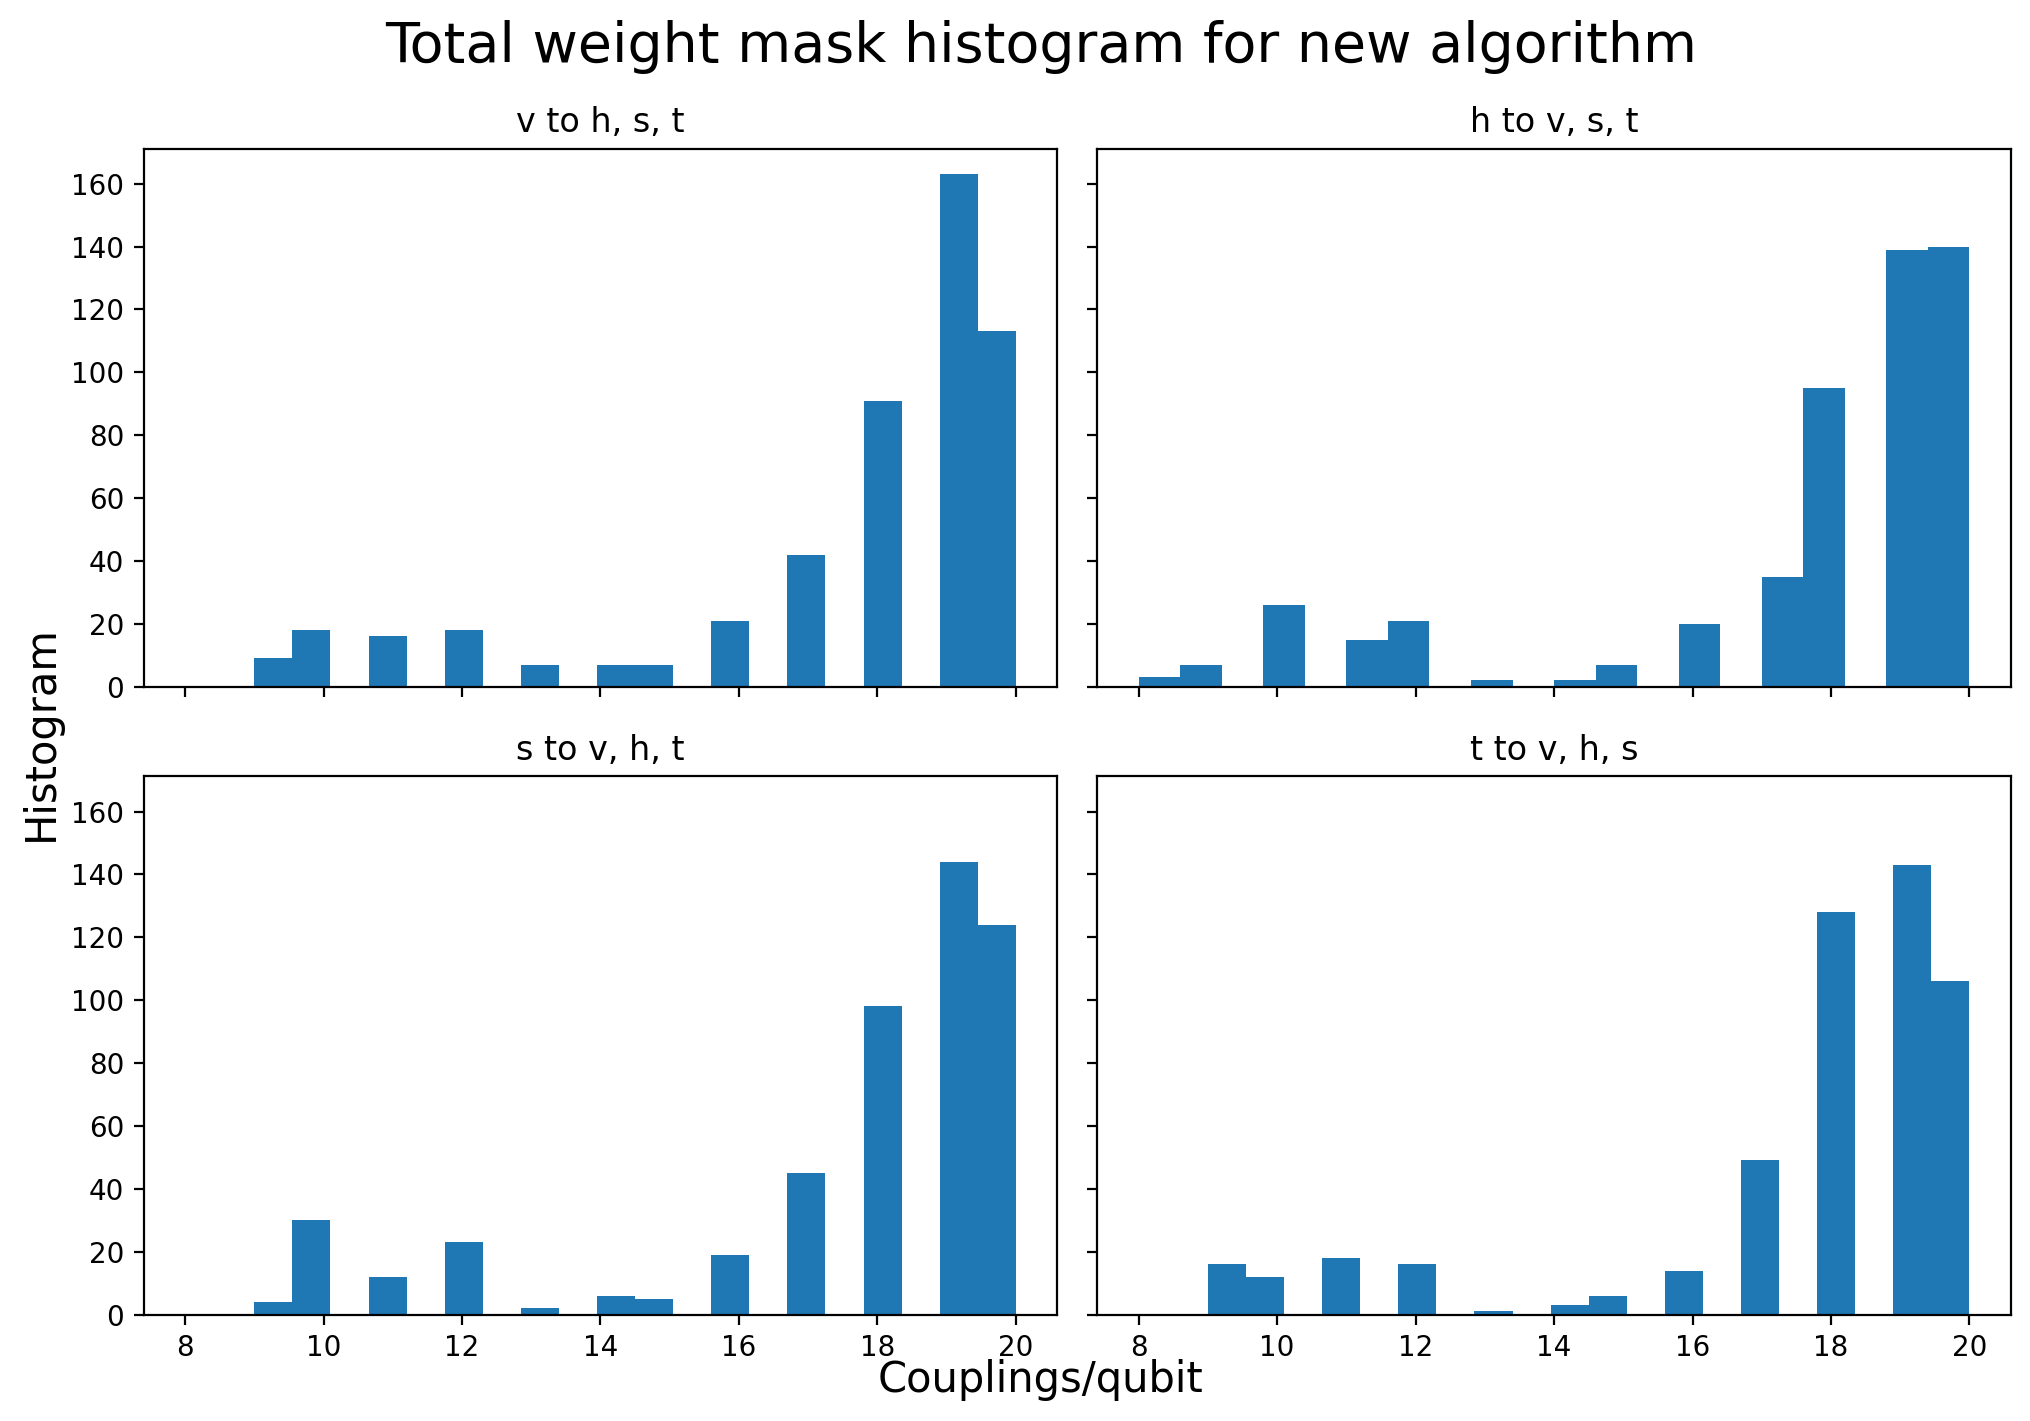

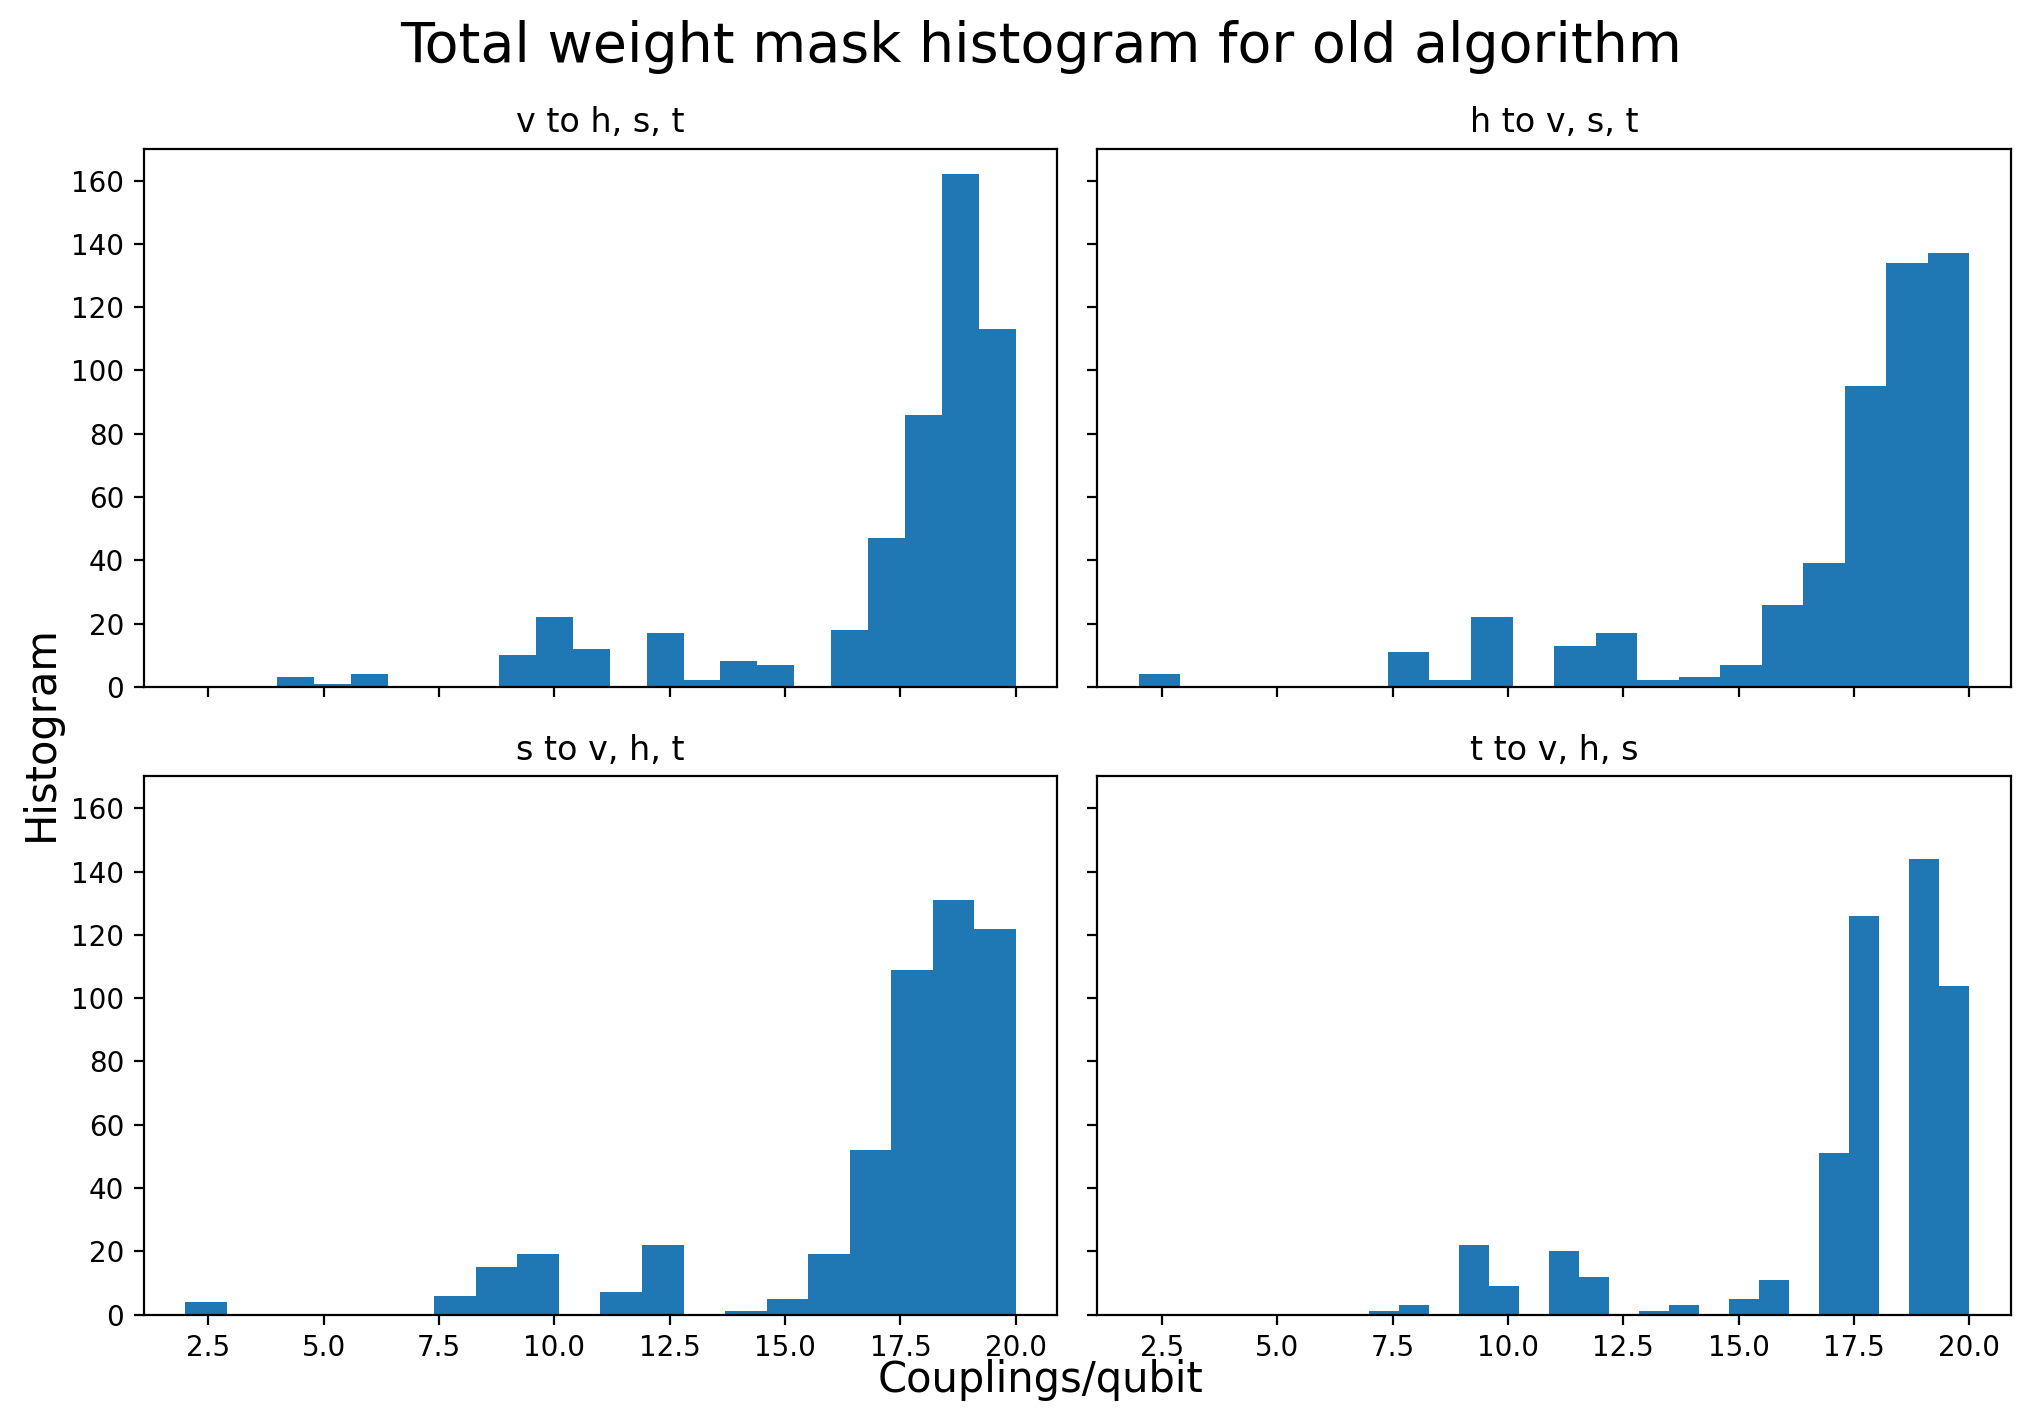

In [8]:
zph = new
# plt.hist(torch.cat((zph._weight_mask_dict['01'],zph._weight_mask_dict['02'],zph._weight_mask_dict['03']),1).sum(dim=1).numpy(), bins=20)
# plt.show()
# plt.hist(torch.cat((zph._weight_mask_dict['01'].transpose(1,0),zph._weight_mask_dict['12'],zph._weight_mask_dict['13']),1).sum(dim=1), bins=20)
# plt.show()
# plt.hist(torch.cat((zph._weight_mask_dict['02'].transpose(1,0),zph._weight_mask_dict['12'].transpose(1,0),zph._weight_mask_dict['23']),1).sum(dim=1), bins=20)
# plt.show()
# plt.hist(torch.cat((zph._weight_mask_dict['03'].transpose(1,0),zph._weight_mask_dict['13'].transpose(1,0),zph._weight_mask_dict['23'].transpose(1,0)),1).sum(dim=1), bins=20)
# plt.show()
def plot_total_weights(zeph, label):
    fig, ax = plt.subplots(2, 2, figsize=(10, 7), sharey=True, sharex=True, tight_layout=True)  # 2x2 grid, figure size 10x10
    fig.text(0.5, 0.0, 'Couplings/qubit', ha='center', fontsize=15)
    fig.text(0.0, 0.4, 'Histogram', rotation=90, ha='center', fontsize=15)
    ax[0, 0].hist(torch.cat((zeph._weight_mask_dict['01'], zeph._weight_mask_dict['02'], zeph._weight_mask_dict['03']), 1).sum(dim=1).numpy(), bins=20)
    ax[0, 0].set_title("v to h, s, t")
    ax[0, 1].hist(torch.cat((zeph._weight_mask_dict['01'].transpose(1,0), zeph._weight_mask_dict['12'], zeph._weight_mask_dict['13']), 1).sum(dim=1), bins=20)
    ax[0, 1].set_title("h to v, s, t")
    ax[1, 0].hist(torch.cat((zeph._weight_mask_dict['02'].transpose(1,0), zeph._weight_mask_dict['12'].transpose(1,0), zeph._weight_mask_dict['23']), 1).sum(dim=1), bins=20)
    ax[1, 0].set_title("s to v, h, t")
    ax[1, 1].hist(torch.cat((zeph._weight_mask_dict['03'].transpose(1,0), zeph._weight_mask_dict['13'].transpose(1,0), zeph._weight_mask_dict['23'].transpose(1,0)), 1).sum(dim=1), bins=20)
    ax[1, 1].set_title("t to v, h, s")
    fig.suptitle(f"Total weight mask histogram for {label}", fontsize=20)

plot_total_weights(new, "new algorithm")
plot_total_weights(old, "old algorithm")

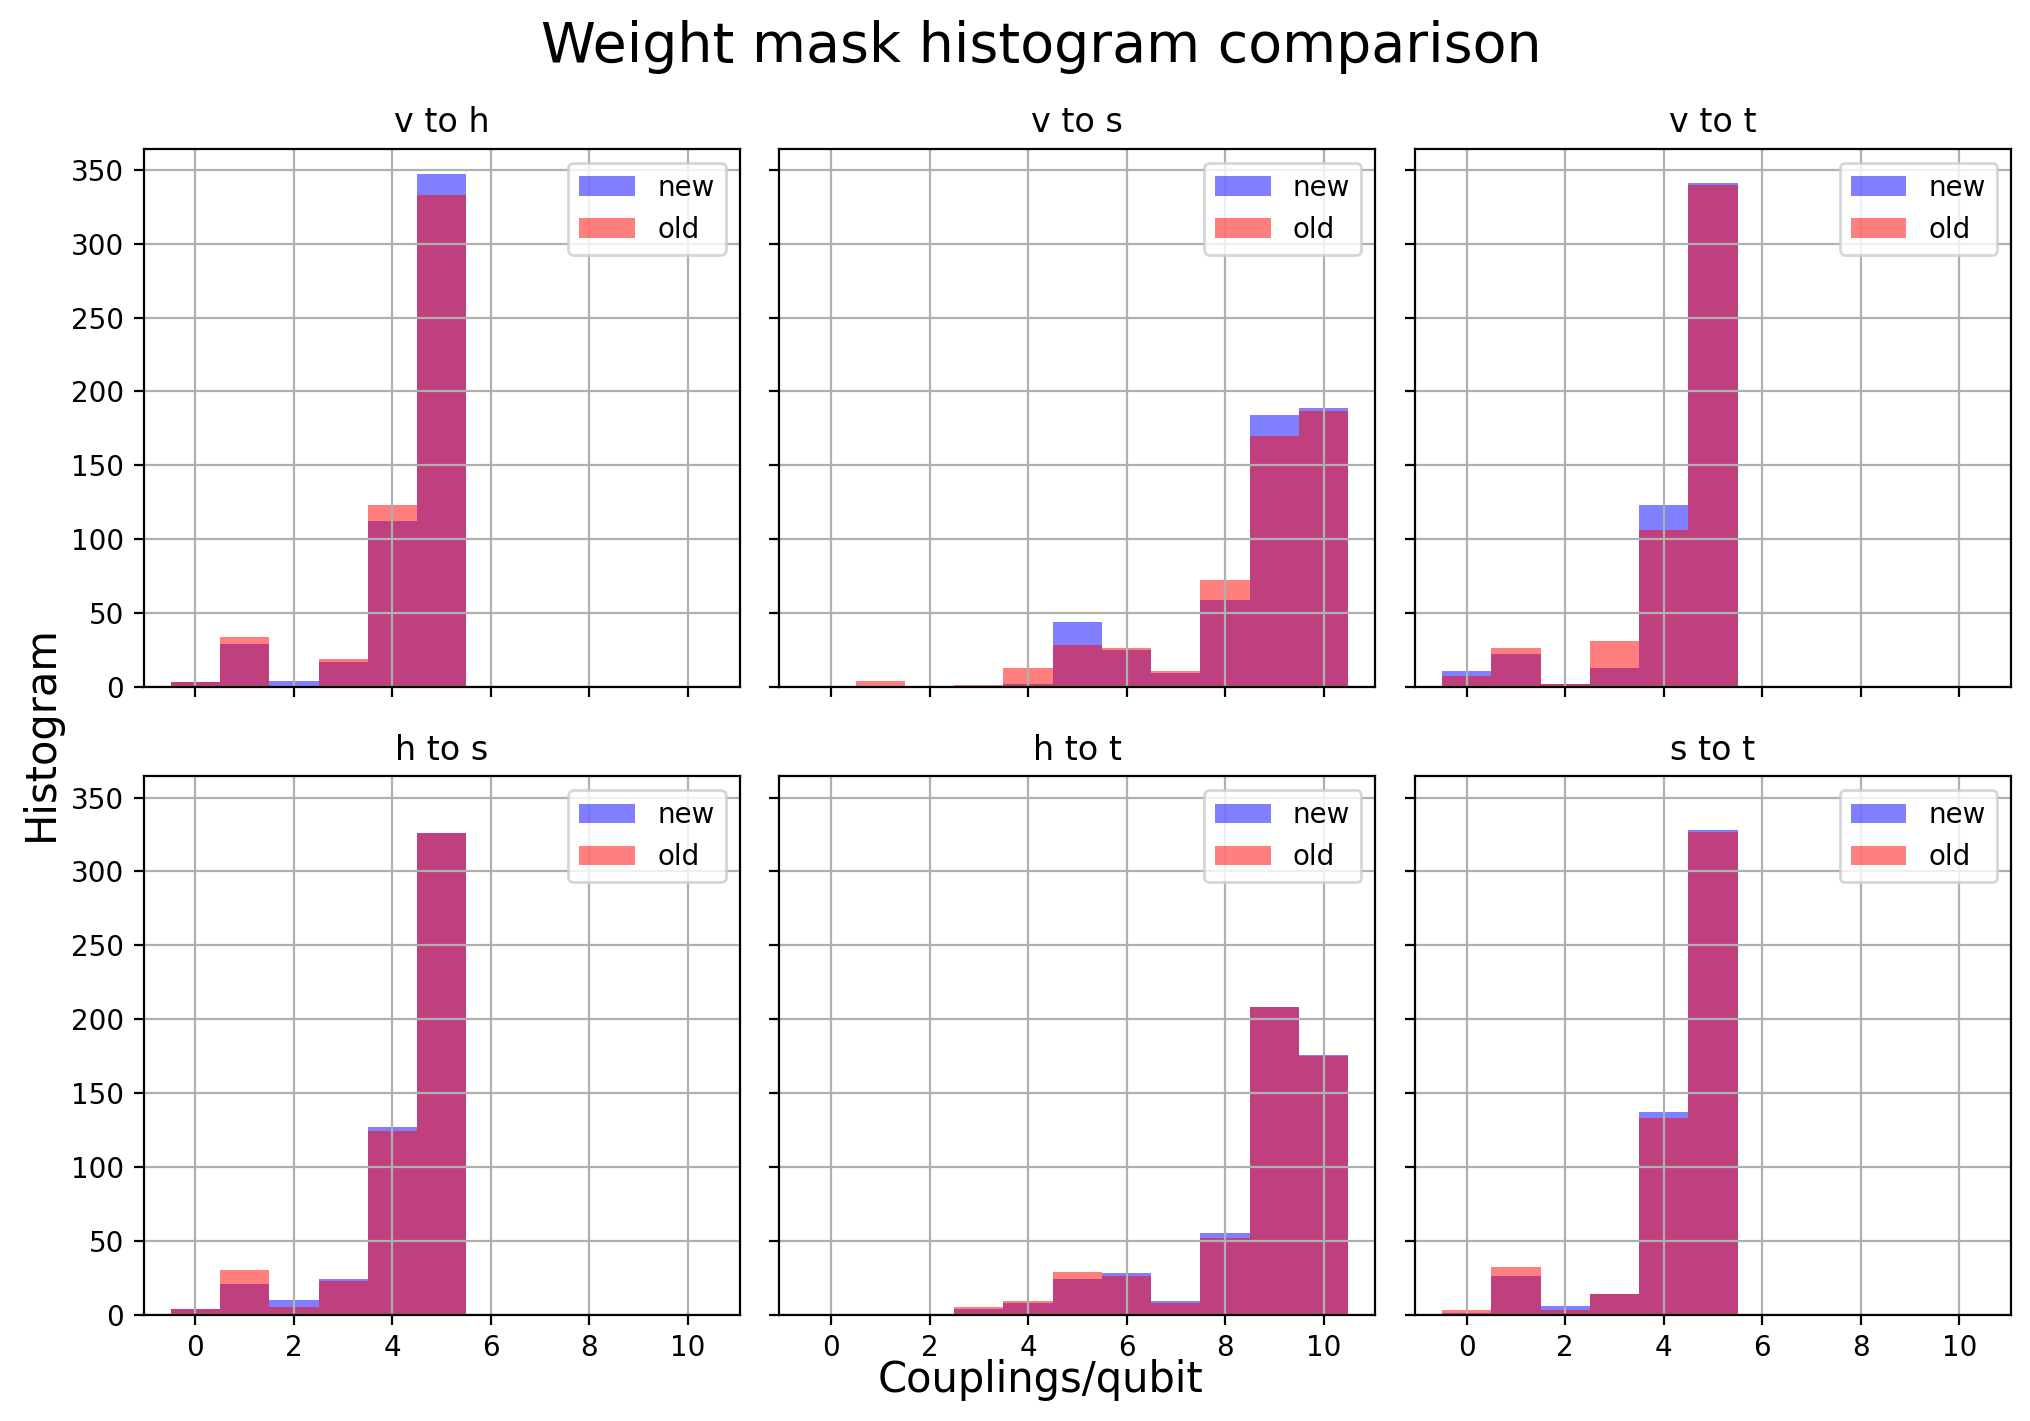

In [ ]:
def plot_weights_overlay(new_data, old_data):
    fig, axs = plt.subplots(2, 3, figsize=(10, 7), sharey=True, sharex=True, tight_layout=True)
    fig.text(0.5, 0.0, 'Couplings/qubit', ha='center', fontsize=15)
    fig.text(0.0, 0.4, 'Histogram', rotation=90, ha='center', fontsize=15)

    keys = ['01', '02', '03', '12', '13', '23']
    titles = ["v to h", "v to s", "v to t", "h to s", "h to t", "s to t"]
    
    for i, key in enumerate(keys):
        ax = axs[i // 3, i % 3]
        data_new = new_data[key]
        data_old = old_data[key]
        # Determine bin edges to align histograms, centering on integers
        min_val = min(data_new.min(), data_old.min())
        max_val = max(data_new.max(), data_old.max())
        bins = np.arange(min_val, max_val + 2) - 0.5  # Shift by 0.5 to center bins on integers
        ax.hist(data_new, bins=bins, alpha=0.5, label='new', color='blue')
        ax.hist(data_old, bins=bins, alpha=0.5, label='old', color='red')
        ax.legend()
        ax.set_title(titles[i])
        ax.grid(True)

    plt.suptitle("Weight mask histogram comparison", fontsize=20)
    plt.show()
plot_weights_overlay(new_data, old_data)

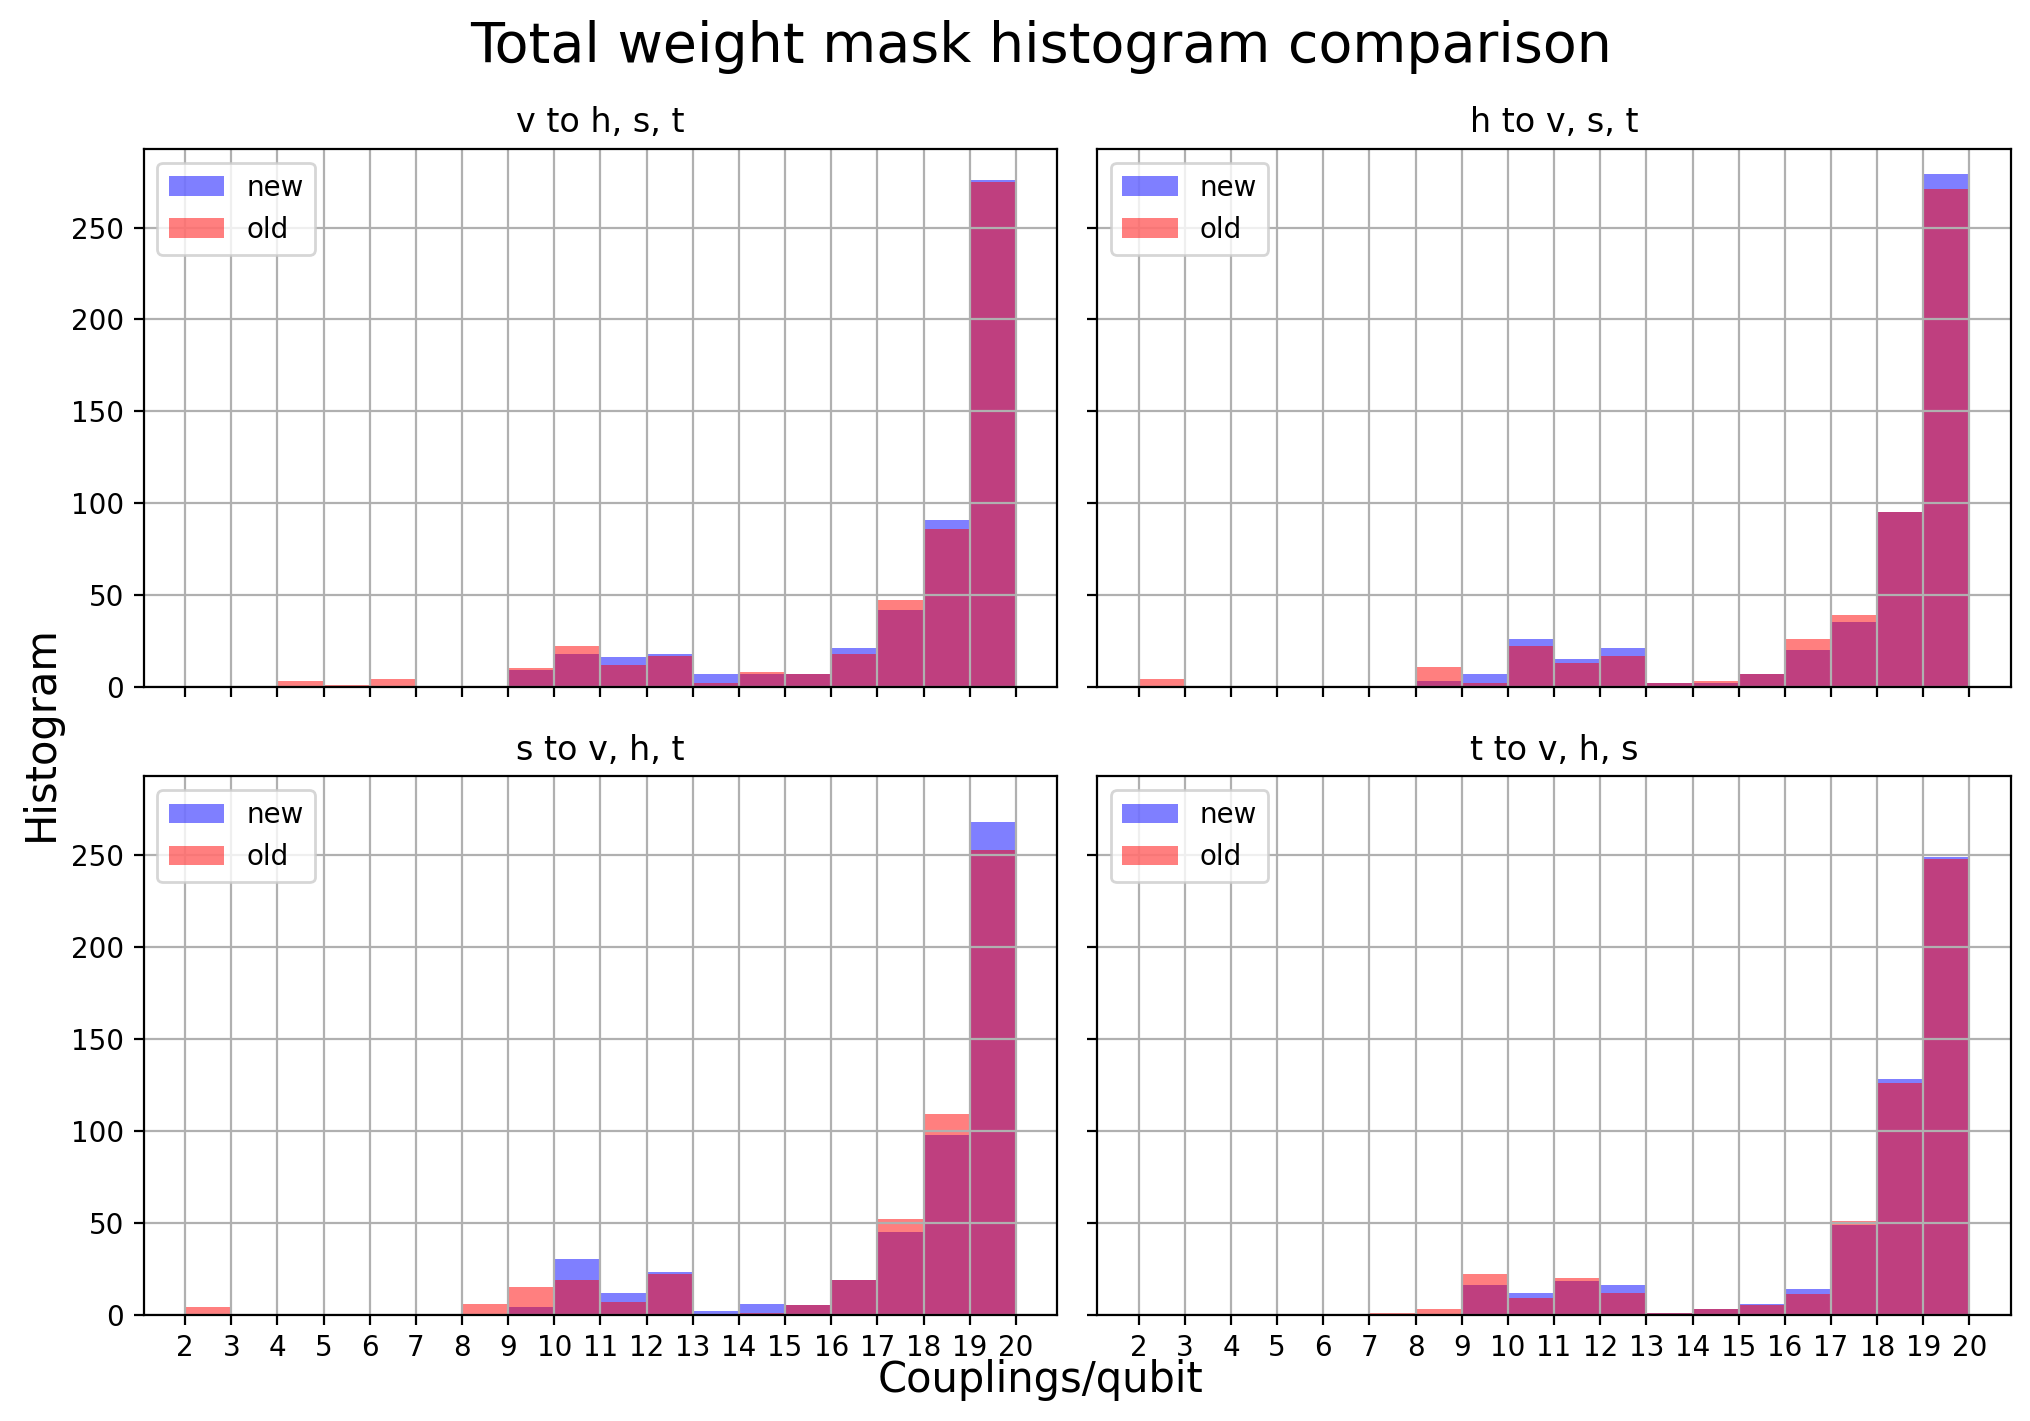

In [16]:
def compute_total_connections(zeph):
    total_v = torch.cat((zeph._weight_mask_dict['01'], zeph._weight_mask_dict['02'], zeph._weight_mask_dict['03']), 1).sum(dim=1).cpu().numpy()
    total_h = torch.cat((zeph._weight_mask_dict['01'].transpose(1,0), zeph._weight_mask_dict['12'], zeph._weight_mask_dict['13']), 1).sum(dim=1).cpu().numpy()
    total_s = torch.cat((zeph._weight_mask_dict['02'].transpose(1,0), zeph._weight_mask_dict['12'].transpose(1,0), zeph._weight_mask_dict['23']), 1).sum(dim=1).cpu().numpy()
    total_t = torch.cat((zeph._weight_mask_dict['03'].transpose(1,0), zeph._weight_mask_dict['13'].transpose(1,0), zeph._weight_mask_dict['23'].transpose(1,0)), 1).sum(dim=1).cpu().numpy()
    return total_v, total_h, total_s, total_t

def plot_total_weights_overlay(new, old):
    fig, axs = plt.subplots(2, 2, figsize=(10, 7), sharey=True, sharex=True, tight_layout=True)
    fig.text(0.5, 0.0, 'Couplings/qubit', ha='center', fontsize=15)
    fig.text(0.0, 0.4, 'Histogram', rotation=90, ha='center', fontsize=15)

    total_new = compute_total_connections(new)
    total_old = compute_total_connections(old)

    all_data = np.concatenate((total_new[0], total_new[1], total_new[2], total_new[3],
                               total_old[0], total_old[1], total_old[2], total_old[3]))
    min_val = int(all_data.min())
    max_val = int(all_data.max())
    bins = np.arange(min_val, max_val + 1, 1)  #

    titles = ["v to h, s, t", "h to v, s, t", "s to v, h, t", "t to v, h, s"]
    
    for i in range(len(titles)):
        ax = axs[i // 2, i % 2]
        data_new = total_new[i]
        data_old = total_old[i]
        ax.hist(data_new, bins=bins, alpha=0.5, label='new', color='blue', align='mid')
        ax.hist(data_old, bins=bins, alpha=0.5, label='old', color='red', align='mid')
        ax.set_xticks(bins)  # Integer ticks
        ax.legend()
        ax.set_title(titles[i])
        ax.grid(True)

    plt.suptitle("Total weight mask histogram comparison", fontsize=20)
    plt.show()


plot_total_weights_overlay(new, old)